# Isogeometric Analysis: Theory and Implementation for the 1D Bar

## What happens under the hood?
*Mathematical Formulation of IGA, Derivation and Assembly of Stiffness Matrix while solving a simple 1D Bar Example*

### Governing Equation - Strong vs Weak Formulation
The governing differential equation for the static structural problem of the 1D Bar is given by:

$$
Δu(x) = -f(x)
$$

where $ Δ $ represents the Laplacian operator. This equation is well known as the Poisson's equation. 

By expanding the laplacian for the 1D Bar problem we end up with the following:

$$
\frac{\partial ^ 2u(x)}{\partial x^2} = -f(x)
$$

This is known as the "Strong form" of the Poisson's equation. This equation can provide the exact solution for particular (finite) points inside the domain or for particular points at the boundaries, caclulated by solving the respective equations for the boundaries (they can be Dirichlet, Neumann or Robin). However, both the domain and boundaries are described by an infinite number of points and in between the selected/particular points for the exact solution of the strong form equations we will end up probably with oscillations, unveiling a huge drawback of the strong form methods. To provide a control between the selected points of the equations the Weak Formulation is recommended instead. As an example we could apply an averaging technique between the particular points of the domain, which is somewhat the case in Finite Element Analysis (FEA) as well. We will not cover the whole derivation procedure for the Weak Formulation of the Poisson's equation but the basic idea behind it is that we multiply the strong form by a test function (the so-called weight function) and integrate over the domain. The test functions are chosen specifically for each problem.


### General Weak Formulation with Dirichlet Boundary Conditions
So, returning back to our methodology, to derive the weak formulation we multiply the strong form by a test function $ v(x) $ and integrate over the domain:

$$
\int_Ω  \frac{\partial ^ 2u(x)}{\partial x^2}v(x) dΩ = - \int_Ω f(x)v(x) dΩ
$$

By applying the integration by parts (Green's Theorem) to the left-hand side to move the derivative from $ u(x) $ to the test function $ v(x) $ we get:

$$
\int_{a}^{b} \frac{\partial^2 u(x)}{\partial x^2}v(x) dx = \left[ \frac{\partial u(x)}{\partial x} v(x) \right]_{a}^{b} - \int_{a}^{b} \frac{\partial u(x)}{\partial x} \frac{\partial v(x)}{\partial x} dx 
$$

Here the term $ \left[ \frac{\partial u(x)}{\partial x} v(x) \right]_{a}^{b} $ is the boundary term evaluated at the boundaries of the domain $ a $ and $ B$ . For the domain $ Ω = [0,1] $ this becomes:

$$
\left[ \frac{\partial u(x)}{\partial x} v(x) \right]_{0}^{1} - \int_{0}^{1} \frac{\partial u(x)}{\partial x} \frac{\partial v(x)}{\partial x} \, dx 
$$

Assuming Dirichlet boundary conditions, where $ u(0) = u(1) = 0 $ we also consider $ v(0)=v(1)=0$. This simplifies the boundary term to zero because the test function $ v(x) $ is zero at the boundaries:

$$
\left[ \frac{\partial u(x)}{\partial x} v(x) \right]_{0}^{1} = 0
$$

Thus, the weak form of the equation reduces to:
$$
\int_{0}^{1} \frac{\partial u(x)}{\partial x} \frac{\partial v(x)}{\partial x} \, dx = \int_{0}^{1} f(x)v(x)\, dx
$$

### Handling Boundary Conditions - Further Explanation (Optional)
In the weak form, the boundary conditions are naturally incorporated through the choice of test functions. For Dirichlet boundary conditions, the test functions are chosen such that they are zero at the boundaries. This ensures that the boundary terms vanish, simplifying the formulation. For Neumann or Robin boundary conditions, the boundary term would not vanish and would need to be included in the weak form. The weak form provides a flexible and stable way to incorporate these conditions and solve the problem numerically.

> This can also be found as:
>$$
\int_Ω \nabla u(x) \nabla v(x) \, dΩ - \int_Ω \frac{\partial u}{\partial n} \, dΓ = \int_Ω f(x)v(x) \, dΩ
>$$
>Given that the boundary condition $ v(x) = 0 $ on $ {\partial Ω}$:
>$$
\int_Ω \nabla u(x) \nabla v(x) \, dΩ = \int_Ω f(x)v(x) \, dΩ
>$$

In the context of the finite element method and isogeometric analysis, the choice of approximating the solution $ u(x) $ and the test function $ v(x) $ using a finite set of basis function $ N_i(x) $ and $ N_j(x)$, respectively, is grounded in the method of weighted residuals and the principle of Galerkin's method.

### Weighted Residuals and Galerkin's Method
The primary goal in numerical methods for partial differential equations (PDEs) is to approximate the continuous solution $ u(x) $ by a discrete function that satisfies the PDE in an average sense over the domain. This is achieved through the method of weighted residuals, where the residual (the error in satisfying the PDE) is minimized in an integral sense.

#### Weighted Residuals
The idea behind the weighted residuals method is to convert the differential equation into an integral form where the residuals (errors) are weighted and forced to be zero over the domain. The residual $ R(u) $ of the differential equation is given by:

$$
R(u) = - \frac{\partial^2u(x)}{\partial x^2} - f(x)
$$

To ensure that the residuals are minimized, we integrate the residual multiplied by a set of weighting functions $ v(x) $ over the domain:
$$
\int_Ω R(u)v(x)\, dΩ = 0
$$

#### Galerkin's Method

Bubnov-Galerkin's method is a specific case of the weighted residuals method where the weighting functions are chosen to be the same as the basis functions used to approximate the solution. This means we use the basis functions $ N_j(x) $ as our weight functions:
$$
\int_Ω (- \frac{\partial^2u(x)}{\partial x^2} - f(x))N_j(x)\, dΩ = 0
$$

We saw previously the technique for eliminating the second derivative by intergating by parts, thus by applying the same principle for the enclosed in parentheses term we end up with:

$$
\int_Ω \frac{\partial^2u(x)}{\partial x^2} N_j(x) dΩ = -\int_Ω \frac{\partial u(x)}{\partial x} \frac{\partial Ν_j(x)}{\partial x} dΩ
$$

Substituting this into the weighted residuals equation we get:
$$
\int_Ω \nabla u(x) \nabla N_j(x)\, dΩ = \int_Ω f(x)N_j(x)\, dΩ
$$

### Approximation of $ u(x)$, $ v(x) $ using Basis Functions

Now, we approximate the solution $ u(x) $ as a linear combination of basis functions $ N_{i}(x)$
$$
u(x) = \sum_{i=Ι} u_iNi(x) 
$$
and
$$
v(x) = N_{j}(x)
$$
$u_{i}$: in case of Isogeometric Analysis these coefficients correspond to the control points. These control points are the unknowns that we solve for in the system of equations. In IGA, the geometry of the domain and the approximation of the solution are both represented using the same set of basis functions (e.g., B-splines or NURBS). The process involves the following steps:

- Geometry Representation: The physical geometry of the domain is defined using control points and basis functions. For example, the shape of the domain is represented as a combination of basis functions and their corresponding control points in the geometric space.
- Solution Approximation: The approximate solution $ u(x) $ is expressed as a linear combination of the same basis functions used for geometry, but with a different set of control points that represent the solution values.

Thus, the control points in the solution approximation are analogous to nodal values in the traditional finite element method (FEM). They represent the values of the solution at specific locations in the parametric domain, which are determined by solving the system of equations derived from the weak form of the governing differential equations.

Here’s how it all ties together:

The basis functions $ N_{i}(x) $ are predefined and depend on the choice of the knot vector and the degree of the basis functions.
The control points $ u_i $ are the unknowns that we need to determine. They scale the basis functions to construct the approximate solution
$u(x)$.

### Formulating the System of Equations
Substituting the approximation into the weak form, we get:
$$
\int_Ω  \nabla (\sum_{i=I} u_iN_i(x)) \nabla N_j(x) dΩ = \int_Ω f(x)N_j(x)dΩ
$$

By linearity of the integral and the dot product, this simplifies to:
$$
\sum_{i=I}ui \int_Ω \nabla (N_i(x)) \nabla N_j(x) dΩ = \int_Ω f(x)N_j(x)dΩ
$$

This leads to a system of linear equations for the coefficients ui:
$$
\sum_{i=I}Kijui = Fj
$$
where
$$
Kij = \int_Ω \nabla Ni(x) \nabla Nj(x) dΩ
$$
$$
Fj = \int_Ω f(x)Nj(x)dΩ
$$

Thus, $ Ku = F$.



So now we've done the whole derivation of the Stiffness Matrix but let's continue with a practical example to see how the local stiffness matrix is constructed and how the assembly of the global stiffness matrix is performed.

## Problem Description

Consider a bar of Length L = 1 m, subjected to a uniform load $ f(x) = 1 $ unit per length. The bar is fixed at both ends with Dirichlet boundary conditions: $ u(0) = u(1) = 0$. Solve the above problem using the Isogeometric Analysis with a discretization of 2 elements and B-Spline basis functions.

## Construct the basis functions - Cox 'de Boor Formula
>For degree 0, the basis functions are defined as:
>$$
N_{i,0}(ξ) =
\begin{cases}
1 & \text{if } \xi_i \leq \xi < \xi_{i+1} \\
0 & \text{otherwise}
\end{cases}
>$$
Basis Functions of Degree p:
For p > 0 the basis functions $ N_{i,p}(ξ) $ are defined recursively as:
>$$
N_{i,p}(ξ) = \frac{ξ - ξ_i}{ξ_{i+p} - ξ_i}N_{i, p-1}(ξ) + \frac{ξ_{i + p + 1} - ξ}{ξ_{i + p + 1} - ξ_{i + 1}}N_{i + 1, p - 1}(ξ)
>$$

## Calculate the Basis Functions for the 1D Bar Problem


Knot vector:  
$$ξ = [0,0,0,0.5,1,1,1]$$
___



For $ ξ_0 = 0 $ and $ ξ_1 = 0$

$$
N_{0,0}(ξ) = 
\begin{cases}
1 & \text{if } 0 \leq \xi < 0 \\
0 & \text{otherwise}
\end{cases}
$$

So: $ N_{0,0}(ξ) = 0$


For $ ξ_1 = 0 $ and $ ξ_2 = 0$

$$
N_{1,0}(ξ) = 
\begin{cases}
1 & \text{if } 0 \leq \xi < 0 \\
0 & \text{otherwise}
\end{cases}
$$
So: $ N_{1,0}(ξ) = 0$


For $ ξ_2 = 0 $ and $ ξ_3 = 0.5$

$$
N_{2,0}(ξ) = 
\begin{cases}
1 & \text{if } 0 \leq \xi < 0.5 \\
0 & \text{otherwise}
\end{cases}
$$


For $ ξ_3 = 0.5 $ and $ ξ_4 = 1$

$$
N_{3,0}(ξ) = 
\begin{cases}
1 & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$


For $ ξ_4 = 1 $ and $ ξ_5 = 1$

$$
N_{4,0}(ξ) = 
\begin{cases}
1 & \text{if } 1 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$
So: $ N_{4,0}(ξ) = 0$


For $ ξ_5 = 1 $ and $ ξ_6 = 1$

$$
N_{5,0}(ξ) = 
\begin{cases}
1 & \text{if } 1 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$
So: $ N_{5,0}(ξ) = 0$

___
>For degree 1, the basis functions are defined as:
>$$
N_{i,1}(ξ) = \frac{ξ - ξ_i}{ξ_{i+1} - ξ_{i}} Ν_{i,0}(ξ) + \frac{ξ_{i+2} - ξ}{ξ_{i+2} - ξ_{i+1}}Ν_{i+1, 0}(ξ)
>$$

Calculate $ N_{0,1} $ :

$ξ_{0} = 0$, $ ξ_{1} = 0$, $ ξ_{2} = 0$

$$
Ν_{0,1}(ξ) = \frac{ξ-ξ_0}{ξ_1-ξ_0}Ν_{0,0}(ξ) + \frac{ξ_2-ξ}{ξ_2-ξ_1}Ν_{1,0}(ξ)
$$

$$
Ν_{0,1}(ξ) = \frac{ξ-0}{0-0}0 + \frac{0-ξ}{0-0}0
$$

Since both terms involve division by zero, we define generally: $ N_{0,1}(ξ) = 0$.


Calculate $ N_{1,1} $ :

$ξ_{1} = 0$, $ ξ_{2} = 0$, $ ξ_{3} = 0.5$

$$
Ν_{1,1}(ξ) = \frac{ξ-ξ_1}{ξ_2-ξ_1}Ν_{1,0}(ξ) + \frac{ξ_3-ξ}{ξ_3-ξ_2}Ν_{2,0}(ξ)
$$

$$
Ν_{1,1}(ξ) = \frac{ξ-0}{0-0}0 + \frac{0.5-ξ}{0.5-0}Ν_{2,0}(ξ)
$$

$$
Ν_{1,1}(ξ) = \frac{0.5-ξ}{0.5}Ν_{2,0}(ξ)
$$

$$
Ν_{1,1}(ξ) = (1-2ξ)Ν_{2,0}(ξ)
$$

By substituting $ N_{2,0} $ from above:

$$
N_{1,1}(ξ) = 
\begin{cases}
1 - 2ξ & \text{if } 0 \leq \xi < 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

Calculate $ N_{2,1} $ :

$ξ_{2} = 0$, $ ξ_{3} = 0.5$, $ ξ_{4} = 1$

$$
Ν_{2,1}(ξ) = \frac{ξ-ξ_2}{ξ_3-ξ_2}Ν_{2,0}(ξ) + \frac{ξ_4-ξ}{ξ_4-ξ_3}Ν_{3,0}(ξ)
$$

$$
Ν_{2,1}(ξ) = \frac{ξ-0}{0.5-0}N_{2,0}(ξ) + \frac{1-ξ}{1-0.5}Ν_{3,0}(ξ)
$$

$$
Ν_{2,1}(ξ) = 2ξ Ν_{2,0}(ξ) +(2-2ξ)Ν_{3,0}(ξ) 
$$

By substituting $ N_{2,0} $ and $ N_{3,0} $ from above:

$$
N_{2,1}(ξ) = 
\begin{cases}
2ξ & \text{if } 0 \leq \xi < 0.5 \\
2-2ξ & \text{if } 0.5 \leq \xi < 1 \\
0 & otherwise
\end{cases}
$$

Calculate $ N_{3,1} $ :

$ξ_{3} = 0.5$, $ ξ_{4} = 1$, $ ξ_{5} = 1$

$$
Ν_{3,1}(ξ) = \frac{ξ-ξ_3}{ξ_4-ξ_3}Ν_{3,0}(ξ) + \frac{ξ_5-ξ}{ξ_5-ξ_4}Ν_{4,0}(ξ)
$$

$$
Ν_{3,1}(ξ) = \frac{ξ-0.5}{1-0.5}N_{3,0}(ξ) + \frac{1-ξ}{1-1}Ν_{4,0}(ξ)
$$

$$
Ν_{3,1}(ξ) = (2ξ-1)Ν_{3,0}(ξ) 
$$

By substituting $ N_{3,0} $ from above:

$$
N_{3,1}(ξ) = 
\begin{cases}
2ξ-1 & \text{if } 0.5 \leq \xi < 1 \\
0 & otherwise
\end{cases}
$$


Calculate $ N_{4,1} $ :

$ξ_{4} = 1$, $ ξ_{5} = 1$, $ ξ_{6} = 1$

$$
Ν_{4,1}(ξ) = \frac{ξ-ξ_4}{ξ_5-ξ_4}Ν_{4,0}(ξ) + \frac{ξ_6-ξ}{ξ_6-ξ_5}Ν_{5,0}(ξ)
$$

$$
Ν_{4,1}(ξ) = \frac{ξ-1}{1-1}N_{4,0}(ξ) + \frac{1-ξ}{1-1}Ν_{5,0}(ξ)
$$

$$
Ν_{4,1}(ξ) = 0 
$$

___
>For degree 2, the basis functions are defined as:
>$$
N_{i,2}(ξ) = \frac{ξ - ξ_i}{ξ_{i+2} - ξ_{i}} Ν_{i,1}(ξ) + \frac{ξ_{i+3} - ξ}{ξ_{i+3} - ξ_{i+1}}Ν_{i+1, 1}(ξ)
>$$

Calculate $ N_{0,2} $ :

$ξ_{0} = 0$, $ ξ_{1} = 0$, $ ξ_{2} = 0$, $ ξ_{3} = 0.5$

$$
Ν_{0,2}(ξ) = \frac{ξ-ξ_0}{ξ_2-ξ_0}Ν_{0,1}(ξ) + \frac{ξ_3-ξ}{ξ_3-ξ_1}Ν_{1,1}(ξ)
$$

$$
Ν_{0,2}(ξ) = (1 - 2ξ)Ν_{1,1}(ξ)
$$

Given the basis functions N_{0,1}(ξ) = 0 and Ν_{1,1}(ξ):
$$
N_{1,1}(ξ) = 
\begin{cases}
1 - 2ξ  & \text{if } 0 \leq \xi < 0.5 \\
0           & \text{otherwise}
\end{cases}
$$

$$
N_{0,2}(ξ) = 
\begin{cases}
(1 - 2ξ)^2  & \text{if } 0 \leq \xi < 0.5 \\
0           & \text{otherwise}
\end{cases}
$$

Calculate $ N_{1,2} $ :

$ξ_{1} = 0$, $ ξ_{2} = 0$, $ ξ_{3} = 0.5$, $ ξ_{4} = 1$

$$
Ν_{1,2}(ξ) = \frac{ξ-ξ_1}{ξ_3-ξ_1}Ν_{1,1}(ξ) + \frac{ξ_4-ξ}{ξ_4-ξ_2}Ν_{2,1}(ξ)
$$

$$
Ν_{1,2}(ξ) = \frac{ξ-0}{0.5-0}Ν_{1,1}(ξ) + \frac{1-ξ}{1-0}Ν_{2,1}(ξ)
$$

$$
Ν_{1,2}(ξ) = 2ξΝ_{1,1}(ξ) + (1-ξ)Ν_{2,1}(ξ)
$$

From the above calculation we know that:
$$
N_{1,1}(ξ) = 
\begin{cases}
1 - 2ξ & \text{if } 0 \leq \xi < 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

$$
N_{2,1}(ξ) = 
\begin{cases}
2ξ & \text{if } 0 \leq \xi < 0.5 \\
2-2ξ & \text{if } 0.5 \leq \xi < 1 \\
0 & otherwise
\end{cases}
$$

$$
N_{1,2}(ξ) = 
\begin{cases}
2ξ(1-2ξ) + (1-ξ)2ξ  & \text{if } 0 \leq \xi < 0.5 \\
(1-ξ)(2-2ξ)         & \text{if } 0.5 \leq \xi < 1 \\    
0                   & \text{otherwise}
\end{cases}
$$

$$
N_{1,2}(ξ) = 
\begin{cases}
4ξ - 6ξ^2       & \text{if } 0 \leq \xi < 0.5 \\
2 - 4ξ + 2ξ^2   & \text{if } 0.5 \leq \xi < 1 \\    
0               & \text{otherwise}
\end{cases}
$$

Calculate $ N_{2,2} $ :

$ξ_{2} = 0$, $ ξ_{3} = 0.5$, $ ξ_{4} = 1$, $ ξ_{5} = 1$

$$
Ν_{2,2}(ξ) = \frac{ξ-ξ_2}{ξ_4-ξ_2}Ν_{2,1}(ξ) + \frac{ξ_5-ξ}{ξ_5-ξ_3}Ν_{3,1}(ξ)
$$

$$
Ν_{2,2}(ξ) = \frac{ξ-0}{1-0}Ν_{2,1}(ξ) + \frac{1-ξ}{1-0.5}Ν_{3,1}(ξ)
$$

$$
Ν_{2,2}(ξ) = ξΝ_{2,1}(ξ) + 2(1-ξ)Ν_{3,1}(ξ)
$$

Given that: 
$$
N_{2,1}(ξ) = 
\begin{cases}
2ξ & \text{if } 0 \leq \xi < 0.5 \\
2-2ξ & \text{if } 0.5 \leq \xi < 1 \\
0 & otherwise
\end{cases}
$$

$$
N_{3,1}(ξ) = 
\begin{cases}
2ξ-1 & \text{if } 0.5 \leq \xi < 1 \\
0 & otherwise
\end{cases}
$$

$$
N_{2,2}(ξ) = 
\begin{cases}
ξ 2ξ                      & \text{if } 0 \leq \xi < 0.5 \\
ξ(2-2ξ) + 2(1-ξ)(2ξ-1)    & \text{if } 0.5 \leq \xi < 1 \\
0 & otherwise
\end{cases}
$$

$$
N_{2,2}(ξ) = 
\begin{cases}
2ξ^2             & \text{if } 0 \leq \xi < 0.5 \\
-6ξ^2 + 8ξ -2    & \text{if } 0.5 \leq \xi < 1 \\
0                & otherwise
\end{cases}
$$

Calculate $ N_{3,2} $ :

$ξ_{3} = 0.5$, $ ξ_{4} = 1$, $ ξ_{5} = 1$, $ ξ_{6} = 1$

$$
Ν_{3,2}(ξ) = \frac{ξ-ξ_3}{ξ_5-ξ_3}Ν_{3,1}(ξ) + \frac{ξ_6-ξ}{ξ_6-ξ_4}Ν_{4,1}(ξ)
$$

$$
Ν_{3,2}(ξ) = \frac{ξ - 0.5}{1 - 0.5}Ν_{3,1}(ξ) + \frac{1 - ξ}{1 - 1}Ν_{4,1}(ξ)
$$

$$
Ν_{3,2}(ξ) = \frac{ξ - 0.5}{0.5}Ν_{3,1}(ξ)
$$

$$
Ν_{3,2}(ξ) = (2ξ - 1)Ν_{3,1}(ξ)
$$

Given that:

$$
N_{3,1}(ξ) = 
\begin{cases}
2ξ-1 & \text{if } 0.5 \leq \xi < 1 \\
0 & otherwise
\end{cases}
$$

$$
N_{3,2}(ξ) = 
\begin{cases}
(2ξ-1)^2    & \text{if } 0.5 \leq \xi < 1 \\
0           & otherwise
\end{cases}
$$

___
Summarize the p = 2 Basis Functions:

$$
N_{0,2}(ξ) = 
\begin{cases}
(1 - 2ξ)^2  & \text{if } 0 \leq \xi < 0.5 \\
0           & \text{otherwise}
\end{cases}
$$

$$
N_{1,2}(ξ) = 
\begin{cases}
4ξ - 6ξ^2       & \text{if } 0 \leq \xi < 0.5 \\
2 - 4ξ + 2ξ^2   & \text{if } 0.5 \leq \xi < 1 \\    
0               & \text{otherwise}
\end{cases}
$$

$$
N_{2,2}(ξ) = 
\begin{cases}
2ξ^2             & \text{if } 0 \leq \xi < 0.5 \\
-6ξ^2 + 8ξ -2    & \text{if } 0.5 \leq \xi < 1 \\
0                & otherwise
\end{cases}
$$

$$
N_{3,2}(ξ) = 
\begin{cases}
(2ξ-1)^2    & \text{if } 0.5 \leq \xi < 1 \\
0           & otherwise
\end{cases}
$$

>*The functions are validated by Journal of Theoretical and Applied Mechanics, Sofia, Vol. 46 No. 4 (2016) pp. 36-75, DOI:10.1515/jtam-2016-0020* 


Calculate the derivatives of the Basis Functions:
$$
\frac {d}{dx} N_{0,2}(ξ) = 
\begin{cases}
8ξ - 4  & \text{if } 0 \leq \xi < 0.5 \\
0       & \text{otherwise}
\end{cases}
$$

$$
\frac {d}{dx} N_{1,2}(ξ) = 
\begin{cases}
4 - 12ξ   & \text{if } 0 \leq \xi < 0.5 \\
-4 + 4ξ   & \text{if } 0.5 \leq \xi < 1 \\    
0         & \text{otherwise}
\end{cases}
$$

$$
\frac {d}{dx} N_{2,2}(ξ) = 
\begin{cases}
4ξ            & \text{if } 0 \leq \xi < 0.5 \\
-12ξ + 8    & \text{if } 0.5 \leq \xi < 1 \\
0             & otherwise
\end{cases}
$$

$$
\frac {d}{dx} N_{3,2}(ξ) = 
\begin{cases}
8ξ - 4    & \text{if } 0.5 \leq \xi < 1 \\
0         & otherwise
\end{cases}
$$


## Calculate the Element's Stiffness Matrix

### Stiffness Matrix in Physical Space
As we saw before, the stiffness matrix $ K $ in the physical space is given by:
$$
K_{ij} = \int_Ω \nabla N_{i}(x) \nabla N_{j}(x)\, dΩ
$$

### Transformation to the Parametric Space:
The transformation is done via the Jacobian determinant $ J$, which accounts for the change of variables from the parametric space $ ξ $ to the physical space $ x$. The Jacobian matrix relates the derivatives in the parametric space to the physical space and the typical Jacobian from $ (x, y) $ to $ (ξ_1, ξ_2) $ is given by:
$$
\begin{equation}
J =
\begin{bmatrix}
\frac{\partial x}{\partial \xi_1} & \frac{\partial x}{\partial \xi_2} \\
\frac{\partial y}{\partial \xi_1} & \frac{\partial y}{\partial \xi_2}
\end{bmatrix}
\end{equation}
$$
The determinant of the Jacobian $ det(J(ξ)) $ gives the area or volume scale factor.
##### Jacobian Determinant for 1D Bar
##### Mapping Function
For a 1D element, the physical coordinate $ x $ is related to the parametric coordinate $ ξ $ via a linear mapping inside each element.
- For Element 1:
$$
x = \frac{ξ + 1}{2} \Rightarrow \frac{dx}{dξ} = \frac{1}{2} \Rightarrow J_{element1} = 0.5
$$
- For Element 2:
$$
x = \frac{ξ + 2}{2} \Rightarrow \frac{dx}{dξ} = \frac{1}{2} \Rightarrow J_{element2} = 0.5
$$

### Gradient in Physical Coordinates
The gradient in the physical domain can be expressed in terms of the parametric domain using the Jacobian with the utilization of chain rule:
$$\nabla N_i(x) = \frac{dN_i}{dx} = \frac{dN_i}{dξ}\frac{dξ}{dx} = \frac{dN_i}{dξ}\frac{1}{J}$$
$$
dΩ = J dξ
$$


Substitute the transformed gradients into the stiffness matrix integral:
$$
K_{ij} = \int_{ξ_{min}}^{ξ_{max}} (\frac{dN_{i}}{dξ}\frac{1}{J})(\frac{dN_{j}}{dξ}\frac{1}{J})J\, dξ
$$
$$
K_{ij} = \int_{ξ_{min}}^{ξ_{max}} (\frac{dN_{i}}{dξ})(\frac{dN_{j}}{dξ})\frac{1}{J}\, dξ
$$
$$
K_{ij} = \frac{1}{2}\int_{ξ_{min}}^{ξ_{max}} (\frac{dN_{i}}{dξ})(\frac{dN_{j}}{dξ})\, dξ
$$



### Gaussian Quadrature to calculate the Integral
But what is the well-established porcedure for calculating the integral of the stiffness matrix $K$?
___
*Gaussian quadrature* is a numerical integration technique used to approximate the integral of a function. It is particularly useful for integrals that are difficult to evaluate analytically. The method uses a set of weighted sample points (or nodes) to approximate the integral. Let's discuss this method in here for a quick recap.

For a given quadrature rule, we have a set of quadrature points $ ξ_{Κ} $ and weights $ W_{K} $:
$$
\int_Ω f(ξ) dΩ \approx \sum_{K} f(ξ_{Κ})W_{K}
$$
So the integral is approximated by the sum of products of the function evaluated at the Gauss points times the respective weight.

For the 1D integration, Gaussian quadrature with 2 points is defined as:
$$
\int_{-1}^{1} f(x)dx = w_1f(x_1) + w_2f(x_2)
$$

This equation is exact for $ f(x) =  $ $1$, $ x$, $ x^2 $ and $ x^3$. Let's examine each case:

$$f(x) = 1 => 2 = w_1 + w_2$$
$$f(x) = x => 0 = w_1x_1 + w_2x_2$$
$$f(x) = x^2 => 2/3 = w_1x_1^2 + w_2x_2^2$$
$$f(x) = x^3 => 0 = w_1x_1^3 + w_2x_2^3$$

$$x_1 = - x_2$$
$$w_1 = w_2$$

$$ w_1 = w_2 = 1 $$
$$ x1 = -1/\sqrt3 $$ 
$$ x2 = 1/\sqrt3 $$

So these are the Gaussian Quadrature Points in the interval [-1, 1] which is the usual case. But do we actually have those points in our domain? The answer is no, so we have to apply a transformation to calculate the Gaussian Quadrature points in the correct interval $\in [0, 1]$.

#### Transform Points from Physical Interval $ [a, b] $ to the reference interval $ [0, 1]$
We will use a linear mapping. For Gaussian quadrature, we typically have Gauss points defined in the reference interval $ [-1, 1]$. However, for the purposes of isogeometric analysis and to match the interval $ [0, 1]$, we will transform points accordingly.

Given a point $ ξ $ in the interval $ [a, b]$, the transformation to the reference interval $ [0, 1] $ is:
$$
ξ_{ref} = \frac{ξ - α}{b - a}
$$

#### Transformation from $ [-1, 1] $ to $ [0, 1]$
For Gaussian quadrature points $ ξ_{gauss} $ in the interval $ [-1, 1]$, the transformation to $ [0, 1] $ is:
$$
ξ_{ref} = \frac{{ξ_{gauss}} + 1}{2}
$$

So using a 2-point Gauss quadrature for the interval $[0, 1]$:

- Gauss points: $$ξ_{1} = \frac{1}{2}(1 - \frac{1}{\sqrt3})$$, $$ξ_{2} = \frac{1}{2}(1 + \frac{1}{\sqrt3})$$
- Gauss weights: $w1 = w = 1$
- NOTE: This is not the case in the 1D Bar example. Here we assume that we have 1 element only for step-by-step demonstration.
  
But we actually have 2 elements: element 1 with $ x \in [0, 0.5] $ and element 2 with $ x \in [0.5, 1] $ so we are going to use the Gauss points for each element in the local parametric space:

### Reference Gauss Points
As we saw:

$$
ξ_{1, ref} = -\frac{1}{\sqrt3} = -0.577
$$
$$
ξ_{2, ref} = \frac{1}{\sqrt3} = 0.577
$$

The weights $ w_1 $ and $ w_2 $ are both 1 for this quadrature.

Element 1 spans [0, 0.5].
Element 2 spans [0.5, 1].

Transformation Formula:
$$
ξ_{Κ} = \frac{(b_{element1} - a_{element1})}{2}j_{k, ref} + \frac{(b_{element2} + a_{element2})}{2}
$$

where $ a $ and $ b $ are the start and end of the element in physical space.

- Element 1:
    $$
    ξ_{K} = \frac{0.5 - 0}{2}ξ_{Κ, ref} + \frac{0.5 + 0}{2} = 0.25ξ_{Κ, ref} + 0.25
    $$
    $$
    ξ_{1, elem1} = 0.106
    $$
    $$
    ξ_{2, elem1} = 0.394
    $$


- Element 2:
    $$
    ξ_{K} = \frac{1 - 0.5}{2}ξ_{Κ, ref} + \frac{1 + 0.5}{2} = 0.25ξ_{Κ, ref} + 0.75
    $$
    $$
    ξ_{1, elem2} = 0.606
    $$
    $$
    ξ_{2, elem2} = 0.894
    $$

Transform the weights also:

$$
w_{k} = \frac{b-a}{2}w_{ref} = 0.25 
$$

because $w_{ref} = 1$ for the 2-point Gaussian Quadrature
___


So finally, with the utilization of Gaussian Quadrature the transformed stiffness matrix to the parametric domain is now given by the following sum:
$$
K_{ij} = \frac{1}{J} \sum_{K = 1}^{2}w_{K}(\frac{dN_i}{dξ}|_{ξ_{Κ}}\frac{dN_j}{dξ}|_{ξ_{Κ}})
$$
or by substituting the Jacobian:
$$
K_{ij} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_i}{dξ}|_{ξ_{Κ}}\frac{dN_j}{dξ}|_{ξ_{Κ}})
$$
$$
K_{ij} = 0.125\sum_{K = 1}^{2}(\frac{dN_i}{dξ}|_{ξ_{Κ}}\frac{dN_j}{dξ}|_{ξ_{Κ}})
$$
where $ K $ is the transformed Gauss Point into our domain of interest $ [0, 1]$.

### 1st Element
For $ ξ_{1} = 0.106 $ and $ ξ_{2} = 0.394$:
$$
\frac{dN_{0,2}}{dξ}|_{ξ1} = 8ξ - 4 = 8 \times 0.106 - 4 = -3.152
$$
$$
\frac{dN_{1,2}}{dξ}|_{ξ1} = 4 - 12ξ = 4 - 12 \times 0.106 = 2.728
$$
$$
\frac{dN_{2,2}}{dξ}|_{ξ1} = 4ξ = 4 \times 0.106 = 0.4226
$$
$$
\frac{dN_{0,2}}{dξ}|_{ξ2} = 8ξ - 4 = 8 \times 0.394 - 4 = -0.848
$$
$$
\frac{dN_{1,2}}{dξ}|_{ξ2} = 4 - 12ξ = 4 - 12 \times 0.394 = -0.728
$$
$$
\frac{dN_{2,2}}{dξ}|_{ξ2} = 4ξ = 4 \times 0.394 = 1.576
$$

Calculate for each pair of basis functions $ i, j$:
1. For $ K_{00}$:
$$
K_{00} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,2}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{00} = 0.125((-3.152)^2 + (-0.848)^2) = 0.125(9.935 + 0.719) = 1.33 
$$

2. For $ K_{01}$:
$$
K_{01} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,2}}{dξ}|_{ξ_{Κ}})(\frac{dN_{1,2}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{01} = 0.125((−3.152 \times 2.728) + (-0.848 \times −0.728)) = 0.125(-8.599 + 0.617) = 0.125(-7.982) \approx -1
$$

3. For $ K_{02}$:
$$
K_{02} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,2}}{dξ}|_{ξ_{Κ}})(\frac{dN_{2,2}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{02} = 0.125((−3.152 \times 0.424) + (-0.848 \times 1.576)) = 0.125(-1.336 + 1.336) = 0
$$

4. For $ K_{11}$:
$$
K_{11} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{1,2}}{dξ}|_{ξ_{Κ}})^2
$$
$$
K_{11} = 0.125 \times ((2.728)^2 + \times (-0.728)^2) = 0.125 (7.442 + 0.529) = \approx 1
$$

5. For $ K_{12}$:
$$
K_{12} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{1,2}}{dξ}|_{ξ_{Κ}})(\frac{dN_{2,2}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{12} = 0.125 ((2.728 \times 0.42265) + (-0.728 \times 1.576)) = 0.125(1.153 - 1.147) x 0.5 \approx 0  
$$

6. For $ K_{22}$:
$$
K_{22} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{2,2}}{dξ}|_{ξ_{Κ}})^2
$$
$$
K_{22} = 0.125 \times ((0.42265)^2 + (1.57735)^2) = 0.125(0.1786 + 2.488) = 0.333
$$

So finally we end up with the stiffness matrix for the 1st element as:

$$
K_{e1} = 
\begin{bmatrix}
1.333       & -1        & -0.333 \\
-1          & 1         & 0 \\
-0.333      & 0         & 0.333 \\
\end{bmatrix}
$$

For $ ξ_{1} = 0.606 $ and $ ξ_{2} = 0.894$:
$$
\frac{dN_{0,2}}{dξ}|_{ξ1} = 4ξ - 4 = 4 \times 0.606 - 4 = -1.576
$$
$$
\frac{dN_{1,2}}{dξ}|_{ξ1} = 8 - 12ξ = 8 - 12 \times 0.606 = 8 - 7.272 = 0.728
$$
$$
\frac{dN_{2,2}}{dξ}|_{ξ1} = 8ξ - 4 = 8 \times 0.606 - 4 = 0.848
$$
$$
\frac{dN_{0,2}}{dξ}|_{ξ2} = 4ξ - 4 = 4 \times 0.894 - 4 = -0.424
$$
$$
\frac{dN_{1,2}}{dξ}|_{ξ2} = 8 - 12ξ = 8 - 12 \times 0.894 = -2.728 
$$
$$
\frac{dN_{2,2}}{dξ}|_{ξ2} = 8ξ - 4 = 8 \times 0.894 - 4 = 3.152 
$$

### 2nd Element
Calculate for each pair of basis functions $ i, j$:
1. For $ K_{00}$: 
$$
K_{00} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,2}}{dξ}|_{ξ_{Κ}})^2
$$
$$
K_{00} = 0.125 ((-1.576)^2 + (-0.424)^2) = 0.125(2.483 + 0.179) \approx 0.333
$$

2. For $ K_{01}$:
$$
K_{01} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,2}}{dξ}|_{ξ_{Κ}})(\frac{dN_{1,2}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{01} = 0.125((-1.576 \times 0.728) + (-0.424 \times −2.728)) = 0.125(-1.147 + 1.156) \approx 0
$$

3. For $ K_{02}$:
$$
K_{02} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,2}}{dξ}|_{ξ_{Κ}})(\frac{dN_{2,2}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{02} = 0.125((-1.576 \times 0.848) + (-0.424 \times 3.152)) = 0.125(-1.336 - 1.336) \approx -0.333
$$

4. For $ K_{11}$:
$$
K_{11} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{1,2}}{dξ}|_{ξ_{Κ}})^2
$$
$$
K_{11} = 0.125 ((0.728)^2 + (-2.728)^2) = 0.125 (0.53 + 7.44) \approx 1
$$

5. For $ K_{12}$:
$$
K_{12} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{1,2}}{dξ}|_{ξ_{Κ}})(\frac{dN_{2,2}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{12} = 0.125 ((0.728 \times 0.848) + (-2.728 \times 3.152)) = 0.125 (0.6173 - 8.5986) \approx -1
$$

6. For $ K_{22}$:
$$
K_{22} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{2,2}}{dξ}|_{ξ_{Κ}})^2
$$
$$
K_{22} = 0.125 ((0.848)^2 + (3.152)^2) = 0.125 (0.7191 + 9.9351) \approx 1.333
$$

So finally we end up with the stiffness matrix for the 1st element as:

$$
K_{e2} = 
\begin{bmatrix}
0.333       & 0     & -0.333 \\
0           & 1     & -1 \\
-0.333      & -1    & 1.333 \\
\end{bmatrix}
$$

### Assemblying the Global Stiffness Matrix
To assemble the global stiffness matrix, we need to combine the stiffness matrices of the individual elements, taking into account that elements are $ C^{1} $ continuous, thus two neighbouring elements share two control points of each knot span. Now for the case of bar, second and third control points are active in both first and second element.

<center><img src="4.png"/></center>

For the 1st Element: 

$$
K = 
\begin{bmatrix}
K_{00}^{(1)} & K_{01}^{(1)} & K_{02}^{(1)} & 0 \\
K_{10}^{(1)} & K_{11}^{(1)} & K_{12}^{(1)} & 0 \\
K_{20}^{(1)} & K_{21}^{(1)} & K_{22}^{(1)} & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

For the 2nd Element:

$$
K = 
\begin{bmatrix}
K_{00}^{(1)}    & K_{01}^{(1)}                 & K_{02}^{(1)}                     & 0 \\
K_{10}^{(1)}    & K_{11}^{(1)} + K_{00}^{(2)}  & K_{12}^{(1)} + K_{01}^{(2)}      & K_{12}^{(1)} + K_{02}^{(2)} \\
K_{20}^{(1)}    & K_{21}^{(1)} + K_{10}^{(2)}  & K_{22}^{(1)} + K_{11}^{(2)}      & K_{12}^{(2)} \\
0               & K_{20}^{(2)}                 & K_{21}^{(2)}                     & K_{22}^{(2)} \\
\end{bmatrix}
$$

And finally by substituting the previously calculated terms we end up to:
$$
K = 
\begin{bmatrix}
1.333   & -1      & -0.333    & 0 \\
-1      & 1.333   & 0         & -0.333 \\
-0.333  & 0       & 1.333     & -1 \\
0       & -0.333  & -1        & 1.333 \\
\end{bmatrix}
$$

### Degree Elevation
#### What will happen if we'll use higher order e.g. Cubic basis functions instead of Quadratic?
Let's assume that we want to use Cubic basis functions instead of the Quadratic ones we used in our previous analysis steps.This can be found elsewhere as p-refinement, which is the method where the degree of the basis functions used for representing the geometry is increased. Firstly, we will need to adjust the knot vector for the higher order basis fucntions. When we perform degree elevation from degree $ p $ to degree $ p + 1$, the multiplicity of the knots is typically increased to maintain the same continuity across the knots. We basically need to increase the multiplicity of all knots so that the continuity requirements are met, as before. The knot vector will now become:
$$
ξ = [0, 0, 0, 0, 0.5, 0.5, 1, 1, 1, 1]
$$
___
As we saw previously for quadratic basis functions in each element:
- Element 1 (interval $ [0, 0.5]$): Basis functions: $ N_{0,2}$, $ N_{1,2}$, $ N_{2,2}$
- Element 2 (interval $ [0.5, 1]$): Basis functions: $ N_{1,2}$, $ N_{2,2}$, $ N_{3,2} $  

The general rule is that each element will have a total of $ p + 1 $ basis functions where p is the order of basis functions.

Let's now investigate the case for the cubic basis functions. Now each element will have $ p + 1 = 3 + 1 = 4 $ basis functions. There will be:
- Element 1 (interval $ [0, 0.5]$): Basis functions $ N_{0,3}$, $ N_{1,3}$, $ N_{2,3}$, $ N_{3,3}$
- Element 2 (interval $ [0.5, 1]$): Basis functions $ N_{1,3}$, $ N_{2,3}$, $ N_{3,3}$, $ N_{4,3}$

FIXME:
The indexing assumes that we eliminate the zero terms, so it's only accounting for the non-zero contributors to the basis functions. This is easily proven by the fact that when we increased the multiplicity, the basis functions for $ p = 0, 1, 2 $ will be the exact same but with their indexes shifted by one position right.

FIXME:
Will I have to calculate all the basis funcs for the knew knot vector -> ASKED.

#### Calculate the Basis Functions of oder $ p = 3$
##### Basis Functions for p = 0:
$$
N_{0,0}(ξ) = 0 
$$

$$
N_{1,0}(ξ) = 0 
$$

$$
N_{2,0}(ξ) = 0 
$$

$$
N_{3,0}(ξ) = 
\begin{cases}
1      & \text{if } 0 \leq \xi < 0.5 \\
0      & \text{otherwise}
\end{cases}
$$

$$
N_{4,0}(ξ) = 0
$$

$$
N_{5,0}(ξ) = 
\begin{cases}
1      & \text{if } 0.5 \leq \xi < 1 \\
0      & \text{otherwise}
\end{cases}
$$

$$
N_{6,0}(ξ) = 0 
$$

$$
N_{7,0}(ξ) = 0 
$$

$$
N_{8,0}(ξ) = 0 
$$

##### Basis Functions for p = 1:
$$
N_{0,1}(ξ) = 0
$$

$$
N_{1,1}(ξ) = 0
$$

$$
N_{2,1}(ξ) = 
\begin{cases}
1 - 2ξ      & \text{if } 0 \leq ξ < 0.5 \\
0           & otherwise
\end{cases}
$$

$$
N_{3,1}(ξ) = 
\begin{cases}
2ξ          & \text{if } 0 \leq ξ < 0.5 \\
0           & otherwise
\end{cases}
$$

$$
N_{4,1}(ξ) = 
\begin{cases}
2 - 2ξ      & \text{if } 0.5 \leq ξ < 1 \\
0           & otherwise
\end{cases}
$$

$$
N_{5,1}(ξ) = 
\begin{cases}
2ξ - 1      & \text{if } 0.5 \leq ξ < 1 \\
0           & otherwise
\end{cases}
$$

$$
N_{6,1}(ξ) = 0
$$

$$
N_{7,1}(ξ) = 0
$$

##### Basis Functions for p = 2:
$$
N_{0,2}(ξ) = 0
$$

$$
N_{1,2}(ξ) = 
\begin{cases}
(1 - 2ξ)^2      & \text{if } 0 \leq \xi < 0.5 \\
0               & otherwise
\end{cases}
$$

$$
N_{2,2}(ξ) = 
\begin{cases}
4ξ(1 - 2ξ)      & \text{if } 0 \leq \xi < 0.5 \\
0               & \text{otherwise}
\end{cases}
$$

$$
N_{3,2}(ξ) = 
\begin{cases}
4ξ^2            & \text{if } 0 \leq \xi < 0.5 \\
(2 - 2ξ)^2      & \text{if } 0.5 \leq \xi < 1 \\
0               & \text{otherwise}
\end{cases}
$$

$$
N_{4,2}(ξ) = 
\begin{cases}
(2ξ - 1)(2 - 2ξ)        & \text{if } 0.5 \leq \xi < 1 \\
0                       & \text{otherwise}
\end{cases}
$$

$$
N_{5,2}(ξ) = 
\begin{cases}
(2ξ - 1)^2    & \text{if } 0.5 \leq \xi < 1 \\
0             & \text{otherwise}
\end{cases}
$$

$$
N_{6,2}(ξ) = 0
$$

##### Basis Functions for p = 3:
$$
N_{i,3}(ξ) = \frac{ξ - ξ_{i}}{ξ_{i+3} - ξ_{i}}Ν_{i,2}(ξ) + \frac{ξ_{i+4} - ξ}{ξ_{i+4} - ξ_{i+1}}N_{i+1, 2}(ξ)
$$

Calculate $ N_{0,3} $ :
$ξ_{0} = 0$, $ ξ_{1} = 0$, $ ξ_{2} = 0$, $ ξ_{3} = 0$, $ ξ_{4} = 0.5$
$$
N_{0,3}(ξ) = \frac{ξ - ξ_{0}}{ξ_{3} - ξ_{0}}Ν_{0,2}(ξ) + \frac{ξ_{4} - ξ}{ξ_{4} - ξ_{1}}N_{1, 2}(ξ)
$$
$$
N_{0,3}(ξ) = \frac{ξ - 0}{0 - 0}Ν_{0,2}(ξ) + \frac{0.5 - ξ}{0.5 - 0}N_{1, 2}(ξ)
$$
$$
N_{0,3}(ξ) = (1 - 2ξ)N_{1, 2}(ξ)
$$

$$
N_{0,3}(ξ) = 
\begin{cases}
(1 - 2ξ)^3                 & \text{if } 0 \leq \xi < 0.5 \\
0                          & otherwise
\end{cases}     
$$

Calculate $ N_{1,3} $ :
$ξ_{1} = 0$, $ ξ_{2} = 0$, $ ξ_{3} = 0$, $ ξ_{4} = 0.5$, $ ξ_{5} = 0.5$

$$
N_{1,3}(ξ) = \frac{ξ - ξ_{1}}{ξ_{4} - ξ_{1}}Ν_{1,2}(ξ) + \frac{ξ_{5} - ξ}{ξ_{5} - ξ_{2}}N_{2,2}(ξ)
$$
$$
N_{1,3}(ξ) = \frac{ξ - 0}{0.5 - 0}Ν_{1, 2}(ξ) + \frac{0.5 - ξ}{0.5 - 0}N_{2, 2}(ξ)
$$
$$
N_{1,3}(ξ) = 2ξΝ_{1, 2}(ξ) + (1 - 2ξ)N_{2, 2}(ξ)
$$

$$
N_{1,3}(ξ) = 
\begin{cases}
6ξ(1 - 2ξ)^2                & \text{if } 0 \leq \xi < 0.5 \\
0                           & otherwise\
\end{cases}
$$

Calculate $ N_{2,3} $ :
$ξ_{2} = 0$, $ ξ_{3} = 0$, $ ξ_{4} = 0.5$, $ ξ_{5} = 0.5$, $ ξ_{6} = 1$
$$
N_{2,3}(ξ) = \frac{ξ - ξ_{2}}{ξ_{5} - ξ_{2}}Ν_{2,2}(ξ) + \frac{ξ_{6} - ξ}{ξ_{6} - ξ_{3}}N_{3,2}(ξ)
$$
$$
N_{2,3}(ξ) = \frac{ξ - 0}{0,5 - 0}Ν_{2, 2}(ξ) + \frac{1 - ξ}{1 - 0}N_{3, 2}(ξ)
$$
$$
N_{2,3}(ξ) = 2ξΝ_{2, 2}(ξ) + (1 - ξ)N_{3, 2}(ξ)
$$
$$
N_{2,3}(ξ) = 
\begin{cases}
-20ξ^3 + 12ξ^2              & \text{if } 0 \leq \xi < 0.5 \\
-4ξ^3 + 12ξ^2 - 12ξ + 4     & \text{if } 0.5 \leq \xi < 1 \\
0                           & otherwise\
\end{cases}
$$

Calculate $ N_{3,3} $ :
$ξ_{3} = 0$, $ ξ_{3} = 0.5$, $ ξ_{4} = 0.5$, $ ξ_{5} = 1$, $ ξ_{6} = 1$
$$
N_{3,3}(ξ) = \frac{ξ - ξ_{3}}{ξ_{6} - ξ_{3}}Ν_{3,2}(ξ) + \frac{ξ_{7} - ξ}{ξ_{7} - ξ_{4}}N_{4,2}(ξ)
$$
$$
N_{3,3}(ξ) = \frac{ξ - 0}{1 - 0}Ν_{3, 2}(ξ) + \frac{1 - ξ}{1 - 0,5}N_{4, 2}(ξ)
$$

$$
N_{3,3}(ξ) = ξΝ_{3, 2}(ξ) + (2 - 2ξ)N_{4, 2}(ξ)
$$

$$
N_{3,3}(ξ) = 
\begin{cases}
4ξ^3                                & \text{if } 0 \leq \xi < 0.5 \\
ξ(2 - 2ξ) + (2 - 2ξ)^3(2ξ - 1)^2    & \text{if } 0.5 \leq \xi < 1 \\
0                                   & otherwise\
\end{cases}
$$

Calculate $ N_{4,3} $ :
$ξ_{4} = 0.5$, $ ξ_{5} = 0.5$, $ ξ_{6} = 1$, $ ξ_{7} = 1$, $ ξ_{8} = 1$
$$
N_{4,3}(ξ) = \frac{ξ - ξ_{4}}{ξ_{7} - ξ_{4}}Ν_{4,2}(ξ) + \frac{ξ_{8} - ξ}{ξ_{8} - ξ_{5}}N_{5,2}(ξ)
$$
$$
N_{4,3}(ξ) = \frac{ξ - 0.5}{1 - 0.5}Ν_{4, 2}(ξ) + \frac{1 - ξ}{1 - 0,5}N_{5, 2}(ξ)
$$
$$
N_{4,3}(ξ) = (2ξ - 1)Ν_{4, 2}(ξ) + (2 - 2ξ)N_{5, 2}(ξ)
$$
$$
N_{4,3}(ξ) = 
\begin{cases}
2(2ξ - 1)^2(2 - 2ξ)                 & \text{if } 0.5 \leq \xi < 1 \\
0                                   & otherwise\
\end{cases}
$$

Calculate $ N_{5,3} $ :
$ξ_{5} = 0.5$, $ ξ_{6} = 1$, $ ξ_{7} = 1$, $ ξ_{8} = 1$, $ ξ_{9} = 1$
$$
N_{5,3}(ξ) = \frac{ξ - ξ_{5}}{ξ_{8} - ξ_{5}}Ν_{5,2}(ξ) + \frac{ξ_{9} - ξ}{ξ_{9} - ξ_{6}}N_{6,2}(ξ)
$$
$$
N_{5,3}(ξ) = \frac{ξ - 0.5}{1 - 0.5}Ν_{4, 2}(ξ) + \frac{1 - ξ}{1 - 1}N_{5, 2}(ξ)
$$
$$
N_{5,3}(ξ) = (2ξ - 1)Ν_{5, 2}(ξ)
$$
$$
N_{5,3}(ξ) = 
\begin{cases}
(2ξ - 1)^3                 & \text{if } 0.5 \leq \xi < 1 \\
0                          & otherwise\
\end{cases}
$$

Summary of odrer p = 3 Basis Functions:
$$
N_{0,3}(ξ) = 
\begin{cases}
(1 - 2ξ)^3                 & \text{if } 0 \leq \xi < 0.5 \\
0                          & otherwise
\end{cases}     
$$
$$
N_{1,3}(ξ) = 
\begin{cases}
6ξ(1 - 2ξ)^2                & \text{if } 0 \leq \xi < 0.5 \\
0                           & otherwise\
\end{cases}
$$
$$
N_{2,3}(ξ) = 
\begin{cases}
-20ξ^3 + 12ξ^2              & \text{if } 0 \leq \xi < 0.5 \\
-4ξ^3 + 12ξ^2 - 12ξ + 4     & \text{if } 0.5 \leq \xi < 1 \\
0                           & otherwise\
\end{cases}
$$
$$
N_{3,3}(ξ) = 
\begin{cases}
4ξ^3                                & \text{if } 0 \leq \xi < 0.5 \\
ξ(2 - 2ξ) + (2 - 2ξ)^3(2ξ - 1)^2    & \text{if } 0.5 \leq \xi < 1 \\
0                                   & otherwise\
\end{cases}
$$
$$
N_{4,3}(ξ) = 
\begin{cases}
2(2ξ - 1)^2(2 - 2ξ)                 & \text{if } 0.5 \leq \xi < 1 \\
0                                   & otherwise\
\end{cases}
$$
$$
N_{5,3}(ξ) = 
\begin{cases}
(2ξ - 1)^3                 & \text{if } 0.5 \leq \xi < 1 \\
0                          & otherwise\
\end{cases}
$$

And their respective derivatives:
$$
\frac{dN_{0,3}(ξ)}{dξ} = 
\begin{cases}
-6(1 - 2ξ)^2   & \text{if } 0 \leq \xi < 0.5 \\
0              & otherwise\
\end{cases}
$$
$$
\frac{dN_{1,3}(ξ)}{dξ} = 
\begin{cases}
6(1 - 2ξ)(1 - 4ξ)  & \text{if } 0 \leq \xi < 0.5 \\
0                  & otherwise
\end{cases}
$$
$$
\frac{dN_{2,3}(ξ)}{dξ} = 
\begin{cases}
-60ξ^2 + 24ξ        & \text{if } 0 \leq \xi < 0.5 \\
-12ξ^2 + 24ξ - 12   & \text{if } 0.5 \leq \xi < 1 \\
0                   & otherwise
\end{cases}
$$
$$
\frac{dN_{3,3}(ξ)}{dξ} = 
\begin{cases}
12ξ^2                       & \text{if } 0 \leq \xi < 0.5 \\
32ξ^3 - 64ξ^2 + 40ξ - 10    & \text{if } 0.5 \leq \xi < 1 \\
0                           & otherwise
\end{cases}
$$
$$
\frac{dN_{4,3}(ξ)}{dξ} = 
\begin{cases}
4(2ξ - 1)(2 - 2ξ) - 4(2ξ - 1)^2     & \text{if } 0.5 \leq \xi < 1 \\
0                                   & otherwise
\end{cases}
$$
$$
\frac{dN_{5,3}(ξ)}{dξ} = 
\begin{cases}
6(2ξ - 1)^2     & \text{if } 0.5 \leq \xi < 1 \\
0               & otherwise
\end{cases}
$$

As we see, there are intervals of coverage for $ [0, 0.5] $ from $ \frac{dN_{0,3}(ξ)}{dξ} $ to $ \frac{dN_{3,3}(ξ)}{dξ} $ and $ [0.5, 1] $ from $ \frac{dN_{2,3}(ξ)}{dξ} $ to $ \frac{dN_{5,3}(ξ)}{dξ}$. So there will be an increase in size in the local stiffness matrix for each element and from $ 3{X}3 $ in the 2nd order basis functions we end up with a local stiffness matrix of $ 4{X}4$. The stiffness matrix for the 3rd order basis functions:

$Κ_{00}$
$Κ_{01}$
$Κ_{02}$
$Κ_{03}$
$Κ_{04}$

$Κ_{10}$
$Κ_{11}$
$Κ_{12}$
$Κ_{13}$
$Κ_{14}$

$Κ_{20}$
$Κ_{21}$
$Κ_{22}$
$Κ_{23}$
$Κ_{24}$

$Κ_{30}$
$Κ_{31}$
$Κ_{32}$
$Κ_{33}$
$Κ_{34}$

___

# Let's expand this problem in 2D (consider also a Multipatch IGA Approach)

# Problem description

To expand the case in two dimensions, a square plate made up of steel material (Young's modulus of $ 210 \times 10^9 N/m^2 $ and Poisson's ratio of $ 0.33$) with unit length and width is taken under consideration. The traction force of $ 10 kN/m $ is applied at both ends in x-direction. The plate is modeled by taking two linear elements in both $u$ and $v$ directions. Since two linear elements are considered, three control points are required along each parametric direction, which results in a total of nine control points. 

1st Step: Assemble the global stiffness matrix. 

2nd Step: Consider a multipatch approach where the geometric domain is divided into 2 patches with 2 elements inside each patch and the 2 patches will share the interface at x = 0.5 with $C^0$ continuity.

<center><img src="5.png"/></center>

# Solution

We will utilize 1st order basis functions for maintaining the simplicity of the problem while providing the whole derivation procedure and all the calculations. The knot vector for both $ u $ and $ v $ directions is $ ξ = [0, 0, 0.5, 1, 1]$. We will have 2 elements in $ u $ direction and 2 in $ v$, so a total of 4 elements.

# Basis Functions 1D to 2D

The plate is modelled as bilinear B-spline surface. There will be two sets of basis functions, one in $ ξ (N_i) $ and another in $ η (Μ_i) $ direction. The method to find the basis functions for B-spline surface is similar to that of B-spline curve. But in 2D case, basis functions are calculated in two directions.

## Construct the basis functions - Cox 'de Boor Formula

>For degree 0, the basis functions are defined as:
>$$
N_{i,0}(ξ) =
\begin{cases}
1 & \text{if } \xi_i \leq \xi < \xi_{i+1} \\
0 & \text{otherwise}
\end{cases}
>$$
Basis Functions of Degree p:
For p > 0 the basis functions $N_{i,p}(ξ)$ are defined recursively as:
>$$
N_{i,p}(ξ) = \frac{ξ - ξ_i}{ξ_{i+p} - ξ_i}N_{i, p-1}(ξ) + \frac{ξ_{i + p + 1} - ξ}{ξ_{i + p + 1} - ξ_{i + 1}}N_{i + 1, p - 1}(ξ)
>$$

Knot vector:  
$$ξ = [0,0,0.5,1,1]$$
___

### 0-Degree Basis Functions

For $ξ_0 = 0$ and $ξ_1 = 0$

$$
N_{0,0}(ξ) = 
\begin{cases}
1 & \text{if } 0 \leq \xi < 0 \\
0 & \text{otherwise}
\end{cases}
$$

So: $N_{0,0}(ξ) = 0$


For $ξ_1 = 0$ and $ξ_2 = 0.5$

$$
N_{1,0}(ξ) = 
\begin{cases}
1 & \text{if } 0 \leq \xi < 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

For $ξ_2 = 0.5$ and $ξ_3 = 1$

$$
N_{2,0}(ξ) = 
\begin{cases}
1 & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$

For $ξ_3 = 1$ and $ξ_4 = 1$

$$
N_{3,0}(ξ) = 
\begin{cases}
1 & \text{if } 1 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$

So: $N_{3,0}(ξ) = 0$

### 1-Degree Basis Functions

>For degree 1, the basis functions are defined as:
>$$
N_{i,1}(ξ) = \frac{ξ - ξ_i}{ξ_{i+1} - ξ_{i}} Ν_{i,0}(ξ) + \frac{ξ_{i+2} - ξ}{ξ_{i+2} - ξ_{i+1}}Ν_{i+1, 0}(ξ)
>$$

Calculate $N_{0,1}$ :

$ξ_{0} = 0$, $ξ_{1} = 0$, $ξ_{2} = 0.5$

$$
Ν_{0,1}(ξ) = \frac{ξ-ξ_0}{ξ_1-ξ_0}Ν_{0,0}(ξ) + \frac{ξ_2-ξ}{ξ_2-ξ_1}Ν_{1,0}(ξ)
$$

$$
Ν_{0,1}(ξ) = \frac{ξ-0}{0-0}0 + \frac{0.5-ξ}{0.5-0}N_{1,0}(ξ)
$$

$$
N_{0,1}(ξ) = 
\begin{cases}
1 - 2ξ & \text{if } 0 \leq \xi < 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

Calculate $N_{1,1}$ :

$ξ_{1} = 0$, $ξ_{2} = 0.5$, $ξ_{3} = 1$

$$
Ν_{1,1}(ξ) = \frac{ξ-ξ_1}{ξ_2-ξ_1}Ν_{1,0}(ξ) + \frac{ξ_3-ξ}{ξ_3-ξ_2}Ν_{2,0}(ξ)
$$

$$
Ν_{1,1}(ξ) = \frac{ξ-0}{0.5-0}Ν_{1,0}(ξ) + \frac{1-ξ}{1-0.5}N_{2,0}(ξ)
$$

$$
N_{1,1}(ξ) = 
\begin{cases}
2ξ & \text{if } 0 \leq \xi < 0.5 \\
2-2ξ & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$

Calculate $N_{2,1}$ :

$ξ_{2} = 0.5$, $ξ_{3} = 1$, $ξ_{4} = 1$

$$
Ν_{2,1}(ξ) = \frac{ξ-ξ_2}{ξ_3-ξ_2}Ν_{2,0}(ξ) + \frac{ξ_4-ξ}{ξ_4-ξ_3}Ν_{3,0}(ξ)
$$

$$
Ν_{2,1}(ξ) = \frac{ξ-0.5}{1-0.5}Ν_{2,0}(ξ) + \frac{1-ξ}{1-1}N_{3,0}(ξ)
$$

$$
N_{2,1}(ξ) = 
\begin{cases}
2ξ - 1 & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$

### Summarizing Basis Functions in 1D

$$
N_{0,1}(ξ) = 
\begin{cases}
1 - 2ξ & \text{if } 0 \leq \xi < 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

$$
N_{1,1}(ξ) = 
\begin{cases}
2ξ & \text{if } 0 \leq \xi < 0.5 \\
2-2ξ & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$

$$
N_{2,1}(ξ) = 
\begin{cases}
2ξ - 1 & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise} \\
\end{cases}
$$

The procedure is the same for the $v$ direction, so we end up with the following:
$$
M_{0,1}(η) = 
\begin{cases}
1 - 2η & \text{if } 0 \leq \xi < 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

$$
M_{1,1}(η) = 
\begin{cases}
2η & \text{if } 0 \leq \xi < 0.5 \\
2 - 2η & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$

$$
M_{2,1}(η) = 
\begin{cases}
2η - 1 & \text{if } 0.5 \leq \xi < 1 \\
0 & \text{otherwise}
\end{cases}
$$

### 1st Order Shape Functions in 2D (Tensor Product of the 1D functions) and their Derivatives

Summarizing the linear basis functions for the $u$ direction:
##### **Element 1: $[0, 0.5] \times [0, 0.5]$**

$$
B_1(\xi, \eta) = N_{0,1}(\xi) \cdot M_{0,1}(\eta) = (1 - 2\xi)(1 - 2\eta)
$$

$$
B_2(\xi, \eta) = N_{1,1}(\xi) \cdot M_{0,1}(\eta) = (2\xi)(1 - 2\eta)
$$

$$
B_3(\xi, \eta) = N_{0,1}(\xi) \cdot M_{1,1}(\eta) = (1 - 2\xi)(2\eta)
$$

$$
B_4(\xi, \eta) = N_{1,1}(\xi) \cdot M_{1,1}(\eta) = (2\xi)(2\eta)
$$

##### **Element 2: $[0.5, 1] \times [0, 0.5]$**

$$
B_5(\xi, \eta) = N_{1,1}(\xi) \cdot M_{0,1}(\eta) = (2 - 2\xi)(1 - 2\eta)
$$

$$
B_6(\xi, \eta) = N_{2,1}(\xi) \cdot M_{0,1}(\eta) = (2\xi - 1)(1 - 2\eta)
$$

$$
B_7(\xi, \eta) = N_{1,1}(\xi) \cdot M_{1,1}(\eta) = (2 - 2\xi)(2 - 2\eta)
$$

$$
B_8(\xi, \eta) = N_{2,1}(\xi) \cdot M_{1,1}(\eta) = (2\xi - 1)(2 - 2\eta)
$$

##### **Element 3: $[0, 0.5] \times [0.5, 1]$**

$$
B_9(\xi, \eta) = N_{0,1}(\xi) \cdot M_{1,1}(\eta) = (1 - 2\xi)(2 - 2\eta)
$$

$$
B_{10}(\xi, \eta) = N_{1,1}(\xi) \cdot M_{1,1}(\eta) = (2\xi)(2 - 2\eta)
$$

$$
B_{11}(\xi, \eta) = N_{0,1}(\xi) \cdot M_{2,1}(\eta) = (1 - 2\xi)(2\eta - 1)
$$

$$
B_{12}(\xi, \eta) = N_{1,1}(\xi) \cdot M_{2,1}(\eta) = (2\xi)(2\eta - 1)
$$

##### **Element 4: $[0.5, 1] \times [0.5, 1]$**

$$
B_{13}(\xi, \eta) = N_{1,1}(\xi) \cdot M_{1,1}(\eta) = (2 - 2\xi)(2 - 2\eta)
$$

$$
B_{14}(\xi, \eta) = N_{2,1}(\xi) \cdot M_{1,1}(\eta) = (2\xi - 1)(2 - 2\eta)
$$

$$
B_{15}(\xi, \eta) = N_{1,1}(\xi) \cdot M_{2,1}(\eta) = (2 - 2\xi)(2\eta - 1)
$$

$$
B_{16}(\xi, \eta) = N_{2,1}(\xi) \cdot M_{2,1}(\eta) = (2\xi - 1)(2\eta - 1)
$$



>*The functions are validated by Journal of Theoretical and Applied Mechanics, Sofia, Vol. 46 No. 4 (2016) pp. 36-75, DOI:10.1515/jtam-2016-0020* 

#### **Derivatives of the Shape Functions**

#### **Element 1: $[0, 0.5] \times [0, 0.5]$**

$$
\frac{\partial B_1}{\partial \xi} = -2(1 - 2\eta)
$$

$$
\frac{\partial B_1}{\partial \eta} = -2(1 - 2\xi)
$$

$$
\frac{\partial B_2}{\partial \xi} = 2(1 - 2\eta)
$$

$$
\frac{\partial B_2}{\partial \eta} = -4\xi
$$

$$
\frac{\partial B_3}{\partial \xi} = -4\eta
$$

$$
\frac{\partial B_3}{\partial \eta} = 2(1 - 2\xi)
$$

$$
\frac{\partial B_4}{\partial \xi} = 4\eta
$$

$$
\frac{\partial B_4}{\partial \eta} = 4\xi
$$

#### **Element 2: $[0.5, 1] \times [0, 0.5]$**

$$
\frac{\partial B_5}{\partial \xi} = -2(1 - 2\eta)
$$

$$
\frac{\partial B_5}{\partial \eta} = -2(2 - 2\xi)
$$

$$
\frac{\partial B_6}{\partial \xi} = 2(1 - 2\eta)
$$

$$
\frac{\partial B_6}{\partial \eta} = -2(2\xi - 1)
$$

$$
\frac{\partial B_7}{\partial \xi} = -2(2 - 2\eta)
$$

$$
\frac{\partial B_7}{\partial \eta} = -2 (2 - 2\xi)
$$

$$
\frac{\partial B_8}{\partial \xi} = 2(2 - 2\eta)
$$

$$
\frac{\partial B_8}{\partial \eta} = -2(2\xi - 1)
$$

#### **Element 3: $[0, 0.5] \times [0.5, 1]$**

$$
\frac{\partial B_9}{\partial \xi} = -2(2 - 2\eta)
$$

$$
\frac{\partial B_9}{\partial \eta} = -2(1 - 2\xi)
$$

$$
\frac{\partial B_{10}}{\partial \xi} = 2(2 - 2\eta)
$$

$$
\frac{\partial B_{10}}{\partial \eta} =  - 4\xi
$$

$$
\frac{\partial B_{11}}{\partial \xi} = -2(2\eta - 1)
$$

$$
\frac{\partial B_{11}}{\partial \eta} = 2(1 - 2\xi)
$$

$$
\frac{\partial B_{12}}{\partial \xi} = 2(2\eta - 1)
$$

$$
\frac{\partial B_{12}}{\partial \eta} = 4\xi
$$

#### **Element 4: $[0.5, 1] \times [0.5, 1]$**

$$
\frac{\partial B_{13}}{\partial \xi} = -4 + 4\eta
$$

$$
\frac{\partial B_{13}}{\partial \eta} = -4 + 4\xi
$$

$$
\frac{\partial B_{14}}{\partial \xi} = 4 - 4\eta
$$

$$
\frac{\partial B_{14}}{\partial \eta} = -2(2\xi - 1)
$$

$$
\frac{\partial B_{15}}{\partial \xi} = -2(2\eta - 1)
$$

$$
\frac{\partial B_{15}}{\partial \eta} = 4 - 4\xi
$$

$$
\frac{\partial B_{16}}{\partial \xi} = 2(2\eta - 1)
$$

$$
\frac{\partial B_{16}}{\partial \eta} = 2(2\xi - 1)
$$


# Stiffness Matrix for the 2D Case

## Introduction

There are two different routes we could follow for the derivation of the Stiffness Matrix:
- Kronecker Product method to construct the Geometric Stiffness Matrix,
- Minimum Potential Energy method, involving B and D matrices, to construct the Engineering Stiffness Matrix representing the actual case.

Both approaches are valid but suited for different contexts and levels of complexity. 

- The Kronecker Product method can simplify the construction of a global stiffness matrix by leveraging tensor products, especially when the problem has separable properties along the u- and v- directions, as in some simplified plate models. In this approach, you are trying to move from the 1D stiffness matrix (like a bar) to a 2D stiffness matrix (like a plate) by constructing the global stiffness matrix as a Kronecker product of two 1D matrices. Without the $B$ and $D$ matrices, you’re essentially working with a simplified model where the strain-displacement relationship might be implicit or trivial. The Kronecker product approach is mainly geometric — it’s less about the detailed mechanics and more about assembling the matrix structure based on pre-computed 1D solutions. The Challenge: Without the $B$ matrix (strain-displacement) and $D$ matrix (material properties), you are not explicitly capturing how nodal displacements lead to internal strains within the element. In finite element analysis (FEA) and some isogeometric analysis (IGA) applications, these matrices are fundamental to linking the displacements of the control points (knots) to the actual deformation and stress distribution inside the element. If your problem is sufficiently simple, or if it's known that displacements and strains are related in a direct way (such as uniform or linear strain distribution  across the element), you can get away with using the Kronecker product. But in general, for more complex or realistic problems, omitting $B$ and $D$ will not give accurate results for strain-stress relationships.

- The Minimum Potential Energy Theorem with B and D matrices is the more general and robust approach used in FEA or IGA. The strain-displacement matrix B is derived from the shape functions, and the constitutive matrix D represents the material properties. These are used to form the element's stiffness matrix. The B matrix links the displacements of the element's control points (knots in IGA or nodes in traditional FEA) to the strains inside the element. Strains are computed as the gradient of the displacement field, and the B matrix encodes this relationship. The D matrix, meanwhile, relates these strains to stresses via the material's constitutive law (e.g. Hooke's law for linear elasticity).

Challenge: Compare the Stiffness Matrices calculated through the Kronecker Product and by using the B Matrix. Are they the same?


# First Approach: Minimum Potential Energy Theorem for the Stiffness Matrix [VALID]

## Stiffness Matrix - Theory

### Introduction - Stiffness Matrix

In real conditions, for a 2D bar (or plate) problem, the situation is more complex than the 1D Bar case as far as the stiffness matrix is concerned. This is basically happening due to the fact that in a 2D case the displacement field $u(x, y)$ is a function of two spatial coordinates, and strains are not directly computed from the displacement field. Instead, strains need to be derived from how the displacement change in both directions.

The stiffness matrix for each element is constructed using the standard formula:
$$
k_e = \int_Ω B^{T}DBdΩ_e
$$
where:
- $B$ is the strain-displacement matrix that relates the strains to the nodal displacements,
- $D$ is the material matrix,
- $Ω_e$ is the domain of the element.

**Apply Gaussian Quadrature**:
For $n$ quadrature points in each direction:
$$
k_e \approx \sum_{i=1}^{n} \sum_{j=1}^{n} w_{i} w_{j} \, B^T(\xi_i, \eta_j) \, D \, B(\xi_i, \eta_j) \, |J_{i,j}|
$$

where:

- $k_e$: The local stiffness matrix for the element.
- $w_i$ and $w_j$: Quadrature weights for numerical integration in the $xi$ and $\eta$ directions, respectively.
- $\xi_i$ and $\eta_j$: Quadrature points (sample points) in the $\xi$ and $\eta$ directions.
- $B(\xi_i, \eta_j)$: The strain-displacement matrix evaluated at the quadrature points $(\xi_i, \eta_j)$.
- $D$: The material property matrix (elasticity matrix).
- $|J_{i,j}|$: The Jacobian determinant for the transformation from the natural (parametric) coordinate system to the physical coordinate system.

### Theory: Strain-Displacement Matrix $B$

#### Definition:
The matrix $B$ connects the displacement field to the strain field within an element. It translates the nodal displacements into strains by incorporating the derivatives of shape functions.

#### Form:
The form of $B$ depends on the dimensions and type of element being used (1D, 2D, or 3D). For example:

#### 1D Bar Element:
$$
B = \frac{dN_i}{dx}
$$
where $\frac{dN_i}{dx}$ is the derivative of the shape function with respect to $x$.

#### 2D Quadrilateral Element:
$$
B =
\begin{bmatrix}
\frac{\partial N_1}{\partial x} & 0 & \frac{\partial N_2}{\partial x} & 0 & \cdots & \frac{\partial N_n}{\partial x} & 0 \\
0 & \frac{\partial N_1}{\partial y} & 0 & \frac{\partial N_2}{\partial y} & \cdots & 0 & \frac{\partial N_n}{\partial y} \\
\frac{\partial N_1}{\partial y} & \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial y} & \frac{\partial N_2}{\partial x} & \cdots & \frac{\partial N_n}{\partial y} & \frac{\partial N_n}{\partial x}
\end{bmatrix}
$$

#### 3D Hexahedral Element:
$$
B =
\begin{bmatrix}
\frac{\partial N_1}{\partial x} & 0 & 0 & \frac{\partial N_2}{\partial x} & 0 & 0 & \cdots & \frac{\partial N_n}{\partial x} & 0 & 0 \\
0 & \frac{\partial N_1}{\partial y} & 0 & 0 & \frac{\partial N_2}{\partial y} & 0 & \cdots & 0 & \frac{\partial N_n}{\partial y} & 0 \\
0 & 0 & \frac{\partial N_1}{\partial z} & 0 & 0 & \frac{\partial N_2}{\partial z} & \cdots & 0 & 0 & \frac{\partial N_n}{\partial z} \\
\frac{\partial N_1}{\partial y} & \frac{\partial N_1}{\partial x} & 0 & \frac{\partial N_2}{\partial y} & \frac{\partial N_2}{\partial x} & 0 & \cdots & \frac{\partial N_n}{\partial y} & \frac{\partial N_n}{\partial x} & 0 \\
0 & \frac{\partial N_1}{\partial z} & \frac{\partial N_1}{\partial x} & 0 & \frac{\partial N_2}{\partial z} & \frac{\partial N_2}{\partial x} & \cdots & 0 & \frac{\partial N_n}{\partial z} & \frac{\partial N_n}{\partial x} \\
\frac{\partial N_1}{\partial z} & 0 & \frac{\partial N_1}{\partial y} & \frac{\partial N_2}{\partial z} & 0 & \frac{\partial N_2}{\partial y} & \cdots & \frac{\partial N_n}{\partial z} & 0 & \frac{\partial N_n}{\partial y}
\end{bmatrix}
$$

#### Understanding the B Matrix Structure

In 2D elasticity problems (like plane stress or plane strain), the displacement field **u** is described by displacements in the $x$-direction ($u_x$) and $y$-direction ($u_y$). The corresponding strains are expressed using both displacements, leading to three different strain components:

- $\varepsilon_x$: Normal strain in the $x$-direction.
- $\varepsilon_y$: Normal strain in the $y$-direction.
- $\gamma_{xy}$: Shear strain.

Thus, the strain vector can be written as:

$$
\boldsymbol{\varepsilon} = 
\begin{bmatrix}
\varepsilon_x \\
\varepsilon_y \\
\gamma_{xy}
\end{bmatrix}
$$
$$
\boldsymbol{\varepsilon} = 
\begin{bmatrix}
\frac{\partial u_x}{\partial x} \\
\frac{\partial u_y}{\partial y} \\
\frac{\partial u_x}{\partial y} + \frac{\partial u_y}{\partial x}
\end{bmatrix}
$$

The **B** matrix relates the strains to the nodal displacements through:

$$
\boldsymbol{\varepsilon} = \mathbf{B} \mathbf{u}
$$

Where $\mathbf{u}$ is the nodal displacement vector:

$$
\mathbf{u} = \begin{bmatrix} u_{x1} & u_{y1} & u_{x2} & u_{y2} & u_{x3} & u_{y3} & u_{x4} & u_{y4} \end{bmatrix}^T
$$

#### Expanded Matrix

For each bilinear quadrilateral element, the nodal displacement degrees of freedom ($u_x, u_y$) are associated with each node of the element. Therefore, the $\mathbf{B}$ matrix needs to account for all 8 degrees of freedom (4 nodes $\times$ 2 DOF per node).

The general form of the $\mathbf{B}$ matrix in 2D is structured to capture these relations:

$$
\mathbf{B} =
\begin{bmatrix}
\frac{\partial N_1}{\partial x} & 0 & \frac{\partial N_2}{\partial x} & 0 & \frac{\partial N_3}{\partial x} & 0 & \frac{\partial N_4}{\partial x} & 0 \\
0 & \frac{\partial N_1}{\partial y} & 0 & \frac{\partial N_2}{\partial y} & 0 & \frac{\partial N_3}{\partial y} & 0 & \frac{\partial N_4}{\partial y} \\
\frac{\partial N_1}{\partial y} & \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial y} & \frac{\partial N_2}{\partial x} & \frac{\partial N_3}{\partial y} & \frac{\partial N_3}{\partial x} & \frac{\partial N_4}{\partial y} & \frac{\partial N_4}{\partial x}
\end{bmatrix}
$$

This arrangement reflects the contributions of both $u_x$ and $u_y$ for each node to the total strain in the element.

#### Break-Down of Your Provided B Matrix

For your specific $\mathbf{B}_1$ matrix in the paper, the structure follows the same pattern for a 4-node bilinear quadrilateral element:

1. **First Row**: Relates to the normal strain in the $x$-direction ($\varepsilon_x$).
   - It only contains terms related to $\frac{\partial N_i}{\partial x}$, so the displacement terms are $u_x$ only (hence the zeros in every second column).
  
2. **Second Row**: Relates to the normal strain in the $y$-direction ($\varepsilon_y$).
   - It only contains terms related to $\frac{\partial N_i}{\partial y}$, so the displacement terms are $u_y$ only (zeros in the $u_x$ terms).

3. **Third Row**: Relates to the shear strain $\gamma_{xy}$, which depends on both $x$- and $y$-displacements.
   - It contains terms involving both $\frac{\partial N_i}{\partial x}$ and $\frac{\partial N_i}{\partial y}$, hence both displacement components contribute to this strain.

### Theory: The Constitutive Matrix $D$

In finite element analysis (FEA), the constitutive matrix $D$ plays a key role in relating stress and strain within a material according to the material's constitutive law. It is sometimes referred to as the material stiffness matrix, and its form depends on the type of material and the dimensionality of the problem (1D, 2D, 3D). Here's an explanation of $D$ and its significance.

#### 1. **Definition of the Constitutive Matrix $D$**

The constitutive matrix $D$ relates the stress vector $\sigma$ to the strain vector $\varepsilon$ through the constitutive equation:

$$
\sigma = D \varepsilon
$$

Where:
- $ \sigma $ is the stress vector, typically containing components like normal and shear stresses.
- $ \varepsilon $ is the strain vector, containing normal and shear strains.
- $ D $ is the constitutive matrix that encodes the material properties like Young’s modulus and Poisson’s ratio for isotropic materials, or more complex behavior for anisotropic materials.

#### 2. **Form of the Constitutive Matrix**

The form of $D$ depends on the type of material and the dimensionality of the problem. For simplicity, let's consider two common cases: plane stress and plane strain in 2D analysis.

##### a) **Plane Stress Case**

In the case of plane stress, the stress state is assumed to be zero in the thickness direction (e.g., thin plates). The constitutive matrix $D$ for an isotropic material in plane stress is given by:

$$
D = \frac{E}{1 - \nu^2}
\begin{bmatrix}
1 & \nu & 0 \\
\nu & 1 & 0 \\
0 & 0 & \frac{1 - \nu}{2}
\end{bmatrix}
$$

Where:
- $E$ is Young's modulus (elastic modulus),
- $\nu$ is Poisson's ratio.

This matrix relates the normal stresses $\sigma_x$ and $\sigma_y$, as well as the shear stress $\tau_{xy}$, to the corresponding strains $\varepsilon_x$, $\varepsilon_y$, and $\gamma_{xy}$.

##### b) **Plane Strain Case**

In the case of plane strain (e.g., thick structures where strains in the thickness direction are negligible), the constitutive matrix for an isotropic material is slightly different:

$$
D = \frac{E}{(1 + \nu)(1 - 2\nu)}
\begin{bmatrix}
1 - \nu & \nu & 0 \\
\nu & 1 - \nu & 0 \\
0 & 0 & \frac{1 - 2\nu}{2}
\end{bmatrix}
$$

In plane strain, there is no strain in the out-of-plane direction, but the stress in that direction is not zero. This requires modifying the constitutive matrix compared to the plane stress case.

#### 3. **3D Constitutive Matrix**

For 3D problems, the constitutive matrix $D$ becomes a 6x6 matrix, taking into account the three normal stresses and three shear stresses:

$$
D = \frac{E}{(1 + \nu)(1 - 2\nu)}
\begin{bmatrix}
1 - \nu & \nu & \nu & 0 & 0 & 0 \\
\nu & 1 - \nu & \nu & 0 & 0 & 0 \\
\nu & \nu & 1 - \nu & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1 - 2\nu}{2} & 0 & 0 \\
0 & 0 & 0 & 0 & \frac{1 - 2\nu}{2} & 0 \\
0 & 0 & 0 & 0 & 0 & \frac{1 - 2\nu}{2}
\end{bmatrix}
$$

This form is more general and applies to 3D elements where stresses and strains occur in all three directions.

#### 4. **Summary of $D$**

- The constitutive matrix $D$ encapsulates the material properties and links stress to strain.
- Its specific form depends on the type of material behavior (isotropic, anisotropic, etc.) and the dimensionality (2D plane stress/strain, 3D).
- For isotropic materials, $D$ is usually expressed in terms of Young's modulus $E$ and Poisson's ratio $\nu$, but for more complex materials, $D$ can include other parameters like shear modulus, thermal expansion, or even anisotropic coefficients.

Thus, $D$ serves as a fundamental tool in converting the strains computed from nodal displacements into stresses, which are critical for determining material behavior under load.


### Theory: Deriving the Jacobian Matrix and Determinant for 2D Elements in IGA

In Isogeometric Analysis (IGA), the Jacobian matrix is essential for transforming coordinates between the parametric domain $(ξ, η)$ and the physical domain $(x, y)$. Below is the step-by-step methodology for calculating the Jacobian matrix and its determinant for 2D elements. For a 2D element, the shape functions $N_i(ξ, η)$ are defined in the parametric domain $[ξ, η]$. The tensor product of 1D shape functions is used to construct these 2D shape functions.

The derivatives of the shape functions with respect to the parametric coordinates $ξ$ and $η$ are:
$$
\frac{\partial N_i}{\partial ξ}, \quad \frac{\partial N_i}{\partial η}
$$

The Jacobian matrix $J$ is used to transform the derivatives of shape functions from the parametric space to the physical space. It is computed as follows:

For each shape function $N_i$, compute the partial derivatives with respect to $ξ$ and $η$:
$$
\frac{\partial x}{\partial ξ} = \sum_{i} \frac{\partial N_i}{\partial ξ} x_i
$$
$$
\frac{\partial x}{\partial η} = \sum_{i} \frac{\partial N_i}{\partial η} x_i
$$
$$
\frac{\partial y}{\partial ξ} = \sum_{i} \frac{\partial N_i}{\partial ξ} y_i
$$
$$
\frac{\partial y}{\partial η} = \sum_{i} \frac{\partial N_i}{\partial η} y_i
$$

where $(x_i, y_i)$ are the coordinates of the $i$-th node in the physical space.

The Jacobian matrix $J$ is formed as:
$$
J = \begin{bmatrix}
\frac{\partial x}{\partial ξ} & \frac{\partial x}{\partial η} \\
\frac{\partial y}{\partial ξ} & \frac{\partial y}{\partial η}
\end{bmatrix}
$$

The determinant of the Jacobian matrix $\text{det}(J)$ is computed as:
$$
\text{det}(J) = \left| \begin{matrix}
\frac{\partial x}{\partial ξ} & \frac{\partial x}{\partial η} \\
\frac{\partial y}{\partial ξ} & \frac{\partial y}{\partial η}
\end{matrix} \right|
$$

To perform numerical integration over a 2D element using Gaussian quadrature, we need to account for the contributions from both parametric directions, $ξ$ and $η$. The correct procedure and final equation are as follows:

**1. Shape Functions and Jacobian**

Ensure that you have the shape functions $N_i(ξ, η)$ and their derivatives with respect to $ξ$ and $η$. Compute the Jacobian matrix $J$ and its determinant $\text{det}(J)$ at each integration point in the parametric space.

**2. Integration Points and Weights**

Define the integration points $(ξ_i, η_j)$ and their associated weights $w_i$ and $w_j$ for both directions. The integration points and weights should be provided for each direction separately.

**3. Numerical Integration**

The numerical integration over the 2D element is performed using the Gaussian quadrature formula:

$$
\int_{\text{element}} f(x, y) \, dA \approx \sum_{i} \sum_{j} w_i \, w_j \, f(x_i, y_j) \, |\text{det}(J_{i,j})|
$$

where:
- $w_i$ and $w_j$ are the weights for the $i$-th and $j$-th integration points in $ξ$ and $η$ directions, respectively.
- $(ξ_i, η_j)$ are the coordinates of the integration points in the parametric space.
- $|\text{det}(J_{i,j})|$ is the absolute value of the Jacobian determinant computed at the integration point $(ξ_i, η_j)$.
- $f(x_i, y_j)$ is the function to be integrated, evaluated at the physical coordinates corresponding to the parametric coordinates $(ξ_i, η_j)$.

Procedure

1. **Transform Integration Points:**

   Convert the parametric coordinates $(ξ_i, η_j)$ to the physical coordinates $(x, y)$ using the shape functions and the Jacobian matrix.

2. **Compute Function Values:**

   Evaluate the function $f(x, y)$ at the transformed physical coordinates.

3. **Calculate Jacobian Determinant:**

   Compute the Jacobian determinant $|\text{det}(J_{i,j})|$ at each integration point.

4. **Apply Weights and Sum:**

   Multiply the function value by the weights $w_i$ and $w_j$, and by the Jacobian determinant, then sum over all integration points.



## Stiffness Matrix - Calculations

### Calculate the Jacobian Matrix and the Determinant for the 2D Elements in IGA

In [175]:
# NODES and INTEGRATION POINTS:

# Define the nodes for each element
nodes_elem_1 = [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
nodes_elem_2 = [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
nodes_elem_3 = [(0, 0.5), (0.5, 0.5), (0, 1), (0.5, 1)]
nodes_elem_4 = [(0.5, 0.5), (1, 0.5), (0.5, 1), (1, 1)]

# Integration points and weights for each element
integration_points_elem_1 = [(0.106, 0.106), (0.394, 0.106), (0.106, 0.394), (0.394, 0.394)]
integration_points_elem_2 = [(0.606, 0.106), (0.894, 0.106), (0.606, 0.394), (0.894, 0.394)]
integration_points_elem_3 = [(0.106, 0.606), (0.394, 0.606), (0.106, 0.894), (0.394, 0.894)]
integration_points_elem_4 = [(0.606, 0.606), (0.894, 0.606), (0.606, 0.894), (0.894, 0.894)]

elements            = [1, 2, 3, 4]
nodes               = [nodes_elem_1, nodes_elem_2, nodes_elem_3, nodes_elem_4]
integration_points  = [integration_points_elem_1, integration_points_elem_2, integration_points_elem_3, integration_points_elem_4]

In [176]:
import numpy as np

# Define shape functions and their derivatives for each element
def shape_function_derivatives(xi, eta, element):
    if element == 1:  # Element 1: [0, 0.5] x [0, 0.5]
        dN_dxi = [-2 * (1 - 2 * eta), 2 * (1 - 2 * eta), -4 * eta, 4 * eta]
        dN_deta = [-2 * (1 - 2 * xi), -4 * xi, 2 * (1 - 2 * xi), 4 * xi]
    elif element == 2:  # Element 2: [0.5, 1] x [0, 0.5]
        dN_dxi = [-2 * (1 - 2 * eta), 2 * (1 - 2*eta), -2 * (2 - 2 * eta), 2 * (2 - 2 * eta)]
        dN_deta = [-2 * (2 - 2 * xi), -2 * (2 * xi - 1), -2 * (2 - 2 * xi), -2 * (2 * xi - 1)]
    elif element == 3:  # Element 3: [0, 0.5] x [0.5, 1]
        dN_dxi = [-2 * (2 - 2 * eta), 2 * (2 - 2 * eta), -2 * (2 * eta - 1), 2 * (2 * eta - 1)]
        dN_deta = [-2 *(1 - 2 * xi), - 4 * xi, 2 * (1 - 2 * xi), 4 * xi]
    elif element == 4:  # Element 4: [0.5, 1] x [0.5, 1]
        dN_dxi = [-4 + 4 * eta, 4 - 4 * eta, -2 * (2 * eta - 1), 2 * (2 * eta - 1)]
        dN_deta = [-4 + 4 * xi, -2 * (2 * xi - 1), 4 - 4 * xi, 2 * (2 * xi - 1)]
    else:
        raise ValueError("Element index out of range")
    
    return dN_dxi, dN_deta

def calculate_jacobian_determinant(integration_point, nodes, element):
    dx_dxi = 0
    dx_deta = 0
    dy_dxi = 0
    dy_deta = 0

    print(f"Integration Points: {integration_point}, Nodes: {nodes}")

    xi, eta = integration_point
    dN_dxi, dN_deta = shape_function_derivatives(xi, eta, element)
    
    for j in range(len(nodes)):
        x, y = nodes[j]  # Fetch node coordinates
    
        # Sum contributions from all nodes for the current integration point
        dx_dxi  += dN_dxi[j] * x
        dx_deta += dN_deta[j] * x
        dy_dxi  += dN_dxi[j] * y
        dy_deta += dN_deta[j] * y

    # Compute the Jacobian matrix
    J = np.array([[dx_dxi, dx_deta],
                  [dy_dxi, dy_deta]])

    # Compute the determinant of the Jacobian matrix
    det_J = np.linalg.det(J)
        
    return J, det_J


# Calculate Jacobian determinants for each integration point in each element
def calculate_jacobian_for_all_elements():
    for element_index, element in enumerate(elements):
        print(f"Element {element}:")
        for integration_point in integration_points[element_index]:    
            J, det_J = calculate_jacobian_determinant(integration_point, nodes[element_index], element)
            print(f"Jacobian Matrix:\n{J}")
            print(f"Jacobian Determinant: {det_J}")
            print()


# Execute the function
calculate_jacobian_for_all_elements()


Element 1:
Integration Points: (0.106, 0.106), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Jacobian Matrix:
[[1. 0.]
 [0. 1.]]
Jacobian Determinant: 1.0

Integration Points: (0.394, 0.106), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Jacobian Matrix:
[[1. 0.]
 [0. 1.]]
Jacobian Determinant: 1.0

Integration Points: (0.106, 0.394), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Jacobian Matrix:
[[1. 0.]
 [0. 1.]]
Jacobian Determinant: 1.0

Integration Points: (0.394, 0.394), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Jacobian Matrix:
[[1. 0.]
 [0. 1.]]
Jacobian Determinant: 1.0

Element 2:
Integration Points: (0.606, 0.106), Nodes: [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
Jacobian Matrix:
[[1. 0.]
 [0. 1.]]
Jacobian Determinant: 1.0

Integration Points: (0.894, 0.106), Nodes: [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
Jacobian Matrix:
[[1. 0.]
 [0. 1.]]
Jacobian Determinant: 1.0

Integration Points: (0.606, 0.394), Nodes: [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
Jacobian Mat

### Weights for 2D IGA Elements

We previously saw the derivation of the Gaussian Quadrature Points for the 1D Bar Problem with 2 elements, with the necessary transformation from the [-1, 1] domain of the reference Quadrature Rule to the domains of interest inside each element. The procedure for calculating the coordinates for the 2D case will be the exact same as for the 1D Bar with the difference that there will be the same calculations for both $ξ$ as well as for $η$ direction. So we will basically end up with 2x2 Gaussian Quadrature inside each element which lead to 4 integration points for each element, thus a total of 16 integration points for the whole plate. The coordinates of the points will be:the previously calculated but in 2D:
- (0.106, 0.106)
- (0.394, 0,106) etc...

So we basically have the coordinates of the integration points. Now we will need to account for the new weights that will be used for each point while applying the Gaussian Quadrature.

For this calculation in 2D we will utilize the following relationship:
$$
w_k = w_{ξ, k} \times w_{η, k}
$$  

where:
- $w_{ξ, k}$ is the weight associated with the Gaussian quadrature point $ξ_k$ in the $ξ$-direction.
- $w_{η, k}$ is the weight associated with the Gaussian quadrature point $ξ_η$ in the $η$-direction.
In 2D, the principle is similar, but we account for the weights in both directions:

- **Reference Domain**: $[-1, 1] \times [-1, 1]$
- **Actual Domain**: $[a_\xi, b_\xi] \times [a_\eta, b_\eta]$

If you use 2-point Gaussian quadrature in both $\xi$ and $\eta$ directions, then:

- **For each Gaussian point, the weight in $\xi$-direction $w_\xi$ is**:
  $$
  w_\xi = \frac{b_\xi - a_\xi}{2} \cdot w_{\text{ref, }\xi}
  $$

- **For each Gaussian point, the weight in $\eta$-direction $w_\eta$ is**:
  $$
  w_\eta = \frac{b_\eta - a_\eta}{2} \cdot w_{\text{ref, }\eta}
  $$

- **Final 2D Weight**:
  
  The final weight for each integration point in 2D is the product of the weights in both directions, scaled by the Jacobian determinant:
  $$
  w_k = \left(\frac{b_\xi - a_\xi}{2} \cdot w_{\text{ref, }\xi}\right) \cdot \left(\frac{b_\eta - a_\eta}{2} \cdot w_{\text{ref, }\eta}\right)
  $$

  Where:
  - $w_{\text{ref, }\xi}$ and $w_{\text{ref, }\eta}$ are typically $1$ for 2-point Gauss quadrature.

So, for 2-point Gaussian quadrature in each direction, the weights in the actual domain will be scaled accordingly.

The weights f each Gaussian Quadrature point will be:

$$
w_k = \left(\frac{0.5 - 0}{2} \cdot 1\right) \cdot \left(\frac{0.5 - 0}{2} \cdot 1\right) = 0.0625
$$


### Summarize Integration Points and Weights

#### **Element 1** (0 ≤ ξ < 0.5, 0 ≤ η < 0.5):
- **Integration Points:**
  - Point 1: $(\xi, \eta) = (0.106, 0.106)$
  - Point 2: $(\xi, \eta) = (0.394, 0.106)$
  - Point 3: $(\xi, \eta) = (0.106, 0.394)$
  - Point 4: $(\xi, \eta) = (0.394, 0.394)$
- **Weights:**
  - Weight for each point: $0.0625$

#### **Element 2** (0.5 ≤ ξ < 1, 0 ≤ η < 0.5):
- **Integration Points:**
  - Point 1: $(\xi, \eta) = (0.606, 0.106)$
  - Point 2: $(\xi, \eta) = (0.894, 0.106)$
  - Point 3: $(\xi, \eta) = (0.606, 0.394)$
  - Point 4: $(\xi, \eta) = (0.894, 0.394)$
- **Weights:**
  - Weight for each point: $0.0625$

#### **Element 3** (0 ≤ ξ < 0.5, 0.5 ≤ η < 1):
- **Integration Points:**
  - Point 1: $(\xi, \eta) = (0.106, 0.606)$
  - Point 2: $(\xi, \eta) = (0.394, 0.606)$
  - Point 3: $(\xi, \eta) = (0.106, 0.894)$
  - Point 4: $(\xi, \eta) = (0.394, 0.894)$
- **Weights:**
  - Weight for each point: $0.0625$

#### **Element 4** (0.5 ≤ ξ < 1, 0.5 ≤ η < 1):
- **Integration Points:**
  - Point 1: $(\xi, \eta) = (0.606, 0.606)$
  - Point 2: $(\xi, \eta) = (0.894, 0.606)$
  - Point 3: $(\xi, \eta) = (0.606, 0.894)$
  - Point 4: $(\xi, \eta) = (0.894, 0.894)$
- **Weights:**
  - Weight for each point: $0.0625$

#### Summary:
- **Integration Points for Each Element:**
  - Points vary based on the element's position in the 2x2 grid.
- **Weights for Each Point:**
  - Weight for each point is $0.00625$, which is the same across all elements.


### Calculate the D Matrix

The $\mathbf{D}$ matrix for plain stress conditions is given by:

$$
\mathbf{D} = \frac{E}{1 - \nu^2}
\begin{bmatrix}
1 & \nu & 0 \\
\nu & 1 & 0 \\
0 & 0 & \frac{1 - \nu}{2}
\end{bmatrix}
$$

where:
- $E$ is the Young's modulus
- $\nu$ is the Poisson's ratio

Given:
- $E = 210 \text{ GPa}$ (Young's modulus)
- $\nu = 0.33$ (Poisson's ratio)

#### Step-by-Step Calculation

1. **Calculate $1 - \nu^2$:**

   $$
   1 - \nu^2 = 1 - 0.33^2 = 1 - 0.1089 = 0.8911
   $$

2. **Calculate $\frac{E}{1 - \nu^2}$:**

   $$
   \frac{E}{1 - \nu^2} = \frac{210}{0.8911} \approx 235.43 \text{ GPa}
   $$

3. **Construct the $\mathbf{D}$ Matrix:**

   $$
   \mathbf{D} = 235.43
   \begin{bmatrix}
   1 & 0.33 & 0 \\
   0.33 & 1 & 0 \\
   0 & 0 & \frac{1 - \nu}{2}
   \end{bmatrix}
   $$

4. **Compute $\frac{1 - \nu}{2}$:**

   $$
   \frac{1 - \nu}{2} = \frac{1 - 0.33}{2} = \frac{0.67}{2} = 0.335
   $$

5. **Substitute and Multiply:**

   $$
   \mathbf{D} = 235.43
   \begin{bmatrix}
   1 & 0.33 & 0 \\
   0.33 & 1 & 0 \\
   0 & 0 & 0.335
   \end{bmatrix}
   $$

   $$
   \mathbf{D} = \begin{bmatrix}
   235.43 & 77.88 & 0 \\
   77.88 & 235.43 & 0 \\
   0 & 0 & 79.48
   \end{bmatrix}
   $$

#### Final Result

The $\mathbf{D}$ matrix for the plain stress case is:

$$
\mathbf{D} = \begin{bmatrix}
235.43 & 77.88 & 0 \\
77.88 & 235.43 & 0 \\
0 & 0 & 79.48
\end{bmatrix}
$$


In [73]:
import numpy as np

# Given values
E = 210  # GPa
nu = 0.33

# Calculate 1 - nu^2
denominator = 1 - nu**2

# Calculate D matrix
factor = E / denominator
D = np.array([
    [1, nu, 0],
    [nu, 1, 0],
    [0, 0, (1 - nu) / 2]
]) * factor

print("D matrix:")
print(D)


D matrix:
[[235.66378633  77.76904949   0.        ]
 [ 77.76904949 235.66378633   0.        ]
 [  0.           0.          78.94736842]]


### B Matrix

For integration in the parametric space $(\xi, \eta)$, the $\mathbf{B}$ matrix is transformed by incorporating the Jacobian of the transformation from the parametric space to the physical space. The transformed $\mathbf{B}$ matrix in the parametric space is structured as follows:

$$
\mathbf{B} =
\begin{bmatrix}
\frac{\partial N_1}{\partial \xi} & 0 & \frac{\partial N_2}{\partial \xi} & 0 & \cdots & \frac{\partial N_n}{\partial \xi} & 0 \\
0 & \frac{\partial N_1}{\partial \eta} & 0 & \frac{\partial N_2}{\partial \eta} & \cdots & 0 & \frac{\partial N_n}{\partial \eta} \\
\frac{\partial N_1}{\partial \eta} & \frac{\partial N_1}{\partial \xi} & \frac{\partial N_2}{\partial \eta} & \frac{\partial N_2}{\partial \xi} & \cdots & \frac{\partial N_n}{\partial \eta} & \frac{\partial N_n}{\partial \xi}
\end{bmatrix}
$$

#### Explanation:
- **First Row**: Contains the derivatives of the shape functions with respect to \(\xi\). There is a zero between each derivative to separate them.
- **Second Row**: Contains the derivatives of the shape functions with respect to \(\eta\). Again, zeros are used for separation.
- **Third Row**: Contains the cross-derivatives (with respect to \(\eta\) and \(\xi\)) and also the respective shape functions.

To summarize, the \( \mathbf{B} \) matrix in the parametric space reflects how the shape function derivatives with respect to \(\xi\) and \(\eta\) contribute to the strain-displacement relationship.

#### Calculation at Integration Points

At the integration point $(\xi_1, \eta_1) = (0.3943, 0.3943)$, the shape function derivatives were calculated earlier as:

- $\frac{\partial N_1}{\partial \xi} = -0.4228$, $\frac{\partial N_1}{\partial \eta} = -0.4228$
- $\frac{\partial N_2}{\partial \xi} = 0.4228$, $\frac{\partial N_2}{\partial \eta} = -1.5772$
- $\frac{\partial N_3}{\partial \xi} = -0.4228$, $\frac{\partial N_3}{\partial \eta} = 1.5772$
- $\frac{\partial N_4}{\partial \xi} = -0.4228$, $\frac{\partial N_4}{\partial \eta} = 0.4228$

After transforming to the physical space, you substitute these values into the structure of the $\mathbf{B}_1$ matrix to obtain the final form that appears in the paper.

#### Conclusion

The $\mathbf{B}$ matrix you provided from the paper reflects the standard form for a 4-node quadrilateral element in 2D problems (plane stress/strain). It incorporates the contributions from both $x$ and $y$-displacements for all four nodes and is evaluated at the integration points. 

The difference you initially saw was due to the need to evaluate $\mathbf{B}$ at each integration point and include all the degrees of freedom of the element.

$$
B_1 = 
\begin{bmatrix}
-0.4228 & 0 & 0.4228 & 0 & -1.5772 & 0 & 1.5772 & 0 \\
0 & -0.4228 & 0 & -1.5772 & 0 & 0.4228 & 0 & 1.5772 \\
-0.4228 & -0.4228 & -1.5772 & 0.4228 & 0.4228 & -1.5772 & 1.5772 & 1.5772
\end{bmatrix}
$$

$$
B_1^T = 
\begin{bmatrix}
-0.4228 & 0 & -0.4228 \\
0 & -0.4228 & -0.4228 \\
0.4228 & 0 & -1.5772 \\
0 & -1.5772 & 0.4228 \\
-1.5772 & 0 & 0.4228 \\
0 & 0.4228 & -1.5772 \\
1.5772 & 1.5772 & 1.5772 \\
0 & 1.5772 & 1.5772
\end{bmatrix}
$$

In [177]:
import numpy as np

def calculate_B_matrix(integration_point, element):
    xi, eta = integration_point
    dN_dxi, dN_deta = shape_function_derivatives(xi, eta, element)
    
    # Construct the B matrix
    B = np.zeros((3, 8))  # 3 rows for 2D problems with 4 nodes, 8 columns for 4 nodes
    
    k = 0
    for i in range(0, 8, 2):
        B[0, i] = dN_dxi[k]
        B[2, i] = dN_deta[k]
        k += 1

    k = 0
    for i in range(1, 8, 2):
        B[1, i] = dN_deta[k]
        B[2, i] = dN_dxi[k]
        k += 1
    
    return B

# Calculate B Matrix for each integration point in each element
def calculate_bmatrix_for_all_elements():
    for element_index, element in enumerate(elements):
        print(f"Element {element}:")
        for integration_point in integration_points[element_index]:    
            B = calculate_B_matrix(integration_point, element)
            print(f"Integration Point: {integration_point}")
            print(f"B Matrix:\n{B}")
            print()


# Execute the function
calculate_bmatrix_for_all_elements()


Element 1:
Integration Point: (0.106, 0.106)
B Matrix:
[[-1.576  0.     1.576  0.    -0.424  0.     0.424  0.   ]
 [ 0.    -1.576  0.    -0.424  0.     1.576  0.     0.424]
 [-1.576 -1.576 -0.424  1.576  1.576 -0.424  0.424  0.424]]

Integration Point: (0.394, 0.106)
B Matrix:
[[-1.576  0.     1.576  0.    -0.424  0.     0.424  0.   ]
 [ 0.    -0.424  0.    -1.576  0.     0.424  0.     1.576]
 [-0.424 -1.576 -1.576  1.576  0.424 -0.424  1.576  0.424]]

Integration Point: (0.106, 0.394)
B Matrix:
[[-0.424  0.     0.424  0.    -1.576  0.     1.576  0.   ]
 [ 0.    -1.576  0.    -0.424  0.     1.576  0.     0.424]
 [-1.576 -0.424 -0.424  0.424  1.576 -1.576  0.424  1.576]]

Integration Point: (0.394, 0.394)
B Matrix:
[[-0.424  0.     0.424  0.    -1.576  0.     1.576  0.   ]
 [ 0.    -0.424  0.    -1.576  0.     0.424  0.     1.576]
 [-0.424 -0.424 -1.576  0.424  0.424 -1.576  1.576  1.576]]

Element 2:
Integration Point: (0.606, 0.106)
B Matrix:
[[-3.576  0.     3.576  0.     1.576  0.  

### Element's Stiffness Matrix 

Total degrees of freedom per element: For each element, there are 
4 control points, each with 2 DOF, leading to a total of:
$$
4 \, (\text{control points}) \times 2 \, (\text{DOF per control point}) = 8 \, \text{degrees of freedom per element}.
$$


In [174]:
# Calculate Element's Stiffness Matrix by summing up the contribution of every integration point in each element
from sympy import Matrix

def calculate_ke_for_all_elements():
    for element_index, element in enumerate(elements):
        print(f"Element {element}:")
        ke = np.zeros((8, 8))
        for integration_point in integration_points[element_index]:    
            B = calculate_B_matrix(integration_point, element)
            print(B)
            B_T = np.transpose(B)
            J, det_J = calculate_jacobian_determinant(integration_point, nodes[element_index], element)
            ke += np.dot(np.dot(B_T, D), B) * det_J * 0.0625
        display(Matrix(ke));

calculate_ke_for_all_elements()

Element 1:
[[-1.576  0.     1.576  0.    -0.424  0.     0.424  0.   ]
 [ 0.    -1.576  0.    -0.424  0.     1.576  0.     0.424]
 [-1.576 -1.576 -0.424  1.576  1.576 -0.424  0.424  0.424]]
Integration Points: (0.106, 0.106), Nodes: [0. 0.]


TypeError: cannot unpack non-iterable numpy.float64 object

### Global Stiffness Matrix Assembly

In [170]:
# Define global DOF for each element
# connectivity = [
#     [0, 1, 3, 4, 9, 10, 12, 13],       # Element 1
#     [1, 2, 4, 5, 10, 11, 13, 14],     # Element 2
#     [3, 4, 6, 7, 12, 13, 15, 16],   # Element 3
#     [4, 5, 7, 8, 13, 14, 16, 17]  # Element 4
# ]

connectivity = [
    [0, 9, 1, 10, 3, 12, 4, 13],       # Element 1
    [1, 10, 2, 11, 4, 13, 5, 14],     # Element 2
    [3, 12, 4, 13, 6, 15, 7, 16],   # Element 3
    [4, 13, 5, 14, 7, 16, 8, 17]  # Element 4
]
# Initialize global stiffness matrix (18 DOF total)
K_global = np.zeros((18, 18))

# Assemble global stiffness matrix from element stiffness matrices
def assemble_global_stiffness_matrix():
    for element_index, element in enumerate(elements):
        print(f"Assembling for Element {element}")
        ke = np.zeros((8, 8))
        for integration_point in integration_points[element_index]:
            B = calculate_B_matrix(integration_point, element)
            B_T = np.transpose(B)
            J, det_J = calculate_jacobian_determinant(integration_point, nodes[element_index], element)
            ke += np.dot(np.dot(B_T, D), B) * 1 * 0.0625
        
        # Global DOF indices for this element
        global_dofs = connectivity[element_index]
        
        # Assemble local stiffness matrix into global stiffness matrix
        for i in range(8):
            for j in range(8):
                K_global[global_dofs[i], global_dofs[j]] += ke[i, j]



# Call the assembly function
assemble_global_stiffness_matrix()

print("\nGlobal Stiffness Matrix:")
display(Matrix(K_global))

Assembling for Element 1
Integration Points: (0.106, 0.106), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Integration Points: (0.394, 0.106), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Integration Points: (0.106, 0.394), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Integration Points: (0.394, 0.394), Nodes: [(0, 0), (0.5, 0), (0, 0.5), (0.5, 0.5)]
Assembling for Element 2
Integration Points: (0.606, 0.106), Nodes: [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
Integration Points: (0.894, 0.106), Nodes: [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
Integration Points: (0.606, 0.394), Nodes: [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
Integration Points: (0.894, 0.394), Nodes: [(0.5, 0), (1, 0), (0.5, 0.5), (1, 0.5)]
Assembling for Element 3
Integration Points: (0.106, 0.606), Nodes: [(0, 0.5), (0.5, 0.5), (0, 1), (0.5, 1)]
Integration Points: (0.394, 0.606), Nodes: [(0, 0.5), (0.5, 0.5), (0, 1), (0.5, 1)]
Integration Points: (0.106, 0.894), Nodes: [(0, 0.5), (0.5, 0.5), (0, 1), (0.5, 1)]
I

Matrix([
[  104.747896307934,  -65.2742120974077,                 0,     13.0839968578162,     -52.5576810683425,                 0,                 0,                     0,                  0,   39.1791044776119, -0.29457973291437,                  0,     0.294579732914372,     -39.1791044776119,                  0,                  0,                    0,                  0],
[ -65.2742120974077,   680.823365278869, -536.601784760408,    -52.5576810683425,     -209.495792615868,  183.106105263158,                 0,                     0,                  0,  0.294579732914372,  78.3582089552239, -0.883739198743113,      39.1791044776119,     -78.3582089552239,  -38.5899450117832,                  0,                    0,                  0],
[                 0,  -536.601784760408,  576.075468970935,                    0,      183.106105263158, -222.579789473684,                 0,                     0,                  0,                  0, 0.883739198743113,  -117.537313432836

### Solution

In [171]:
# Initialize global force vector (18 DOF total)
F_global = np.zeros(18)

# Apply traction force on the right-most nodes in the x-direction
traction_force = 10000/3  # 10 KN/m
right_nodes_dofs = [2, 5, 8]  # DOF indices for right-most nodes in x-direction

# Apply force evenly distributed among right-most nodes
for dof in right_nodes_dofs:
    F_global[dof] += traction_force

# Apply displacement boundary conditions (left-most nodes restricted in x-direction)
left_nodes_dofs = [0, 9, 3, 12, 6, 15]  # DOF indices for left-most nodes in x-direction
for dof in left_nodes_dofs:
    # Set row and column corresponding to this DOF to zero in K_global
    K_global[dof, :] = 0
    K_global[:, dof] = 0
    
    # Set the diagonal to a large value (simulate a fixed boundary)
    K_global[dof, dof] = 1e8
    
    # Set the corresponding value in the global force vector to zero
    F_global[dof] = 0

# Display the modified global stiffness matrix and global force vector
print("Modified Global Stiffness Matrix:")
display(Matrix(K_global))

print("Global Force Vector:")
display(Matrix(F_global))

import numpy as np

# Solve the system K_global * u = F_global
def solve_displacement():
    # Ensure K_global is non-singular and boundary conditions are applied
    u_global = np.linalg.solve(K_global, F_global)
    
    return u_global

# Get the global displacement vector
displacement_vector = solve_displacement()

# Display the displacement vector
print("Displacement Vector:")
display(Matrix(displacement_vector))



Modified Global Stiffness Matrix:


Matrix([
[100000000.0,                  0,                 0,           0,                    0,                 0,           0,                     0,                  0,           0,                 0,                  0,           0,                     0,                  0,           0,                    0,                  0],
[          0,   680.823365278869, -536.601784760408,           0,    -209.495792615868,  183.106105263158,           0,                     0,                  0,           0,  78.3582089552239, -0.883739198743113,           0,     -78.3582089552239,  -38.5899450117832,           0,                    0,                  0],
[          0,  -536.601784760408,  576.075468970935,           0,     183.106105263158, -222.579789473684,           0,                     0,                  0,           0, 0.883739198743113,  -117.537313432836,           0,      38.5899450117832,   78.0636292223095,           0,                    0,                  0],
[         

Global Force Vector:


Matrix([
[               0],
[               0],
[3333.33333333333],
[               0],
[               0],
[3333.33333333333],
[               0],
[               0],
[3333.33333333333],
[               0],
[               0],
[               0],
[               0],
[               0],
[               0],
[               0],
[               0],
[               0]])

Displacement Vector:


Matrix([
[                0],
[ 30.1016863434255],
[ 54.0080195517899],
[                0],
[ 14.3654852336921],
[ 60.2350447076985],
[                0],
[  31.421552333288],
[ 57.1150637990668],
[                0],
[ 6.39020217957882],
[ 6.62495906676586],
[                0],
[ 1.11280797311286],
[ -1.5366734148095],
[                0],
[-9.93568411566701],
[-15.0668650143676]])

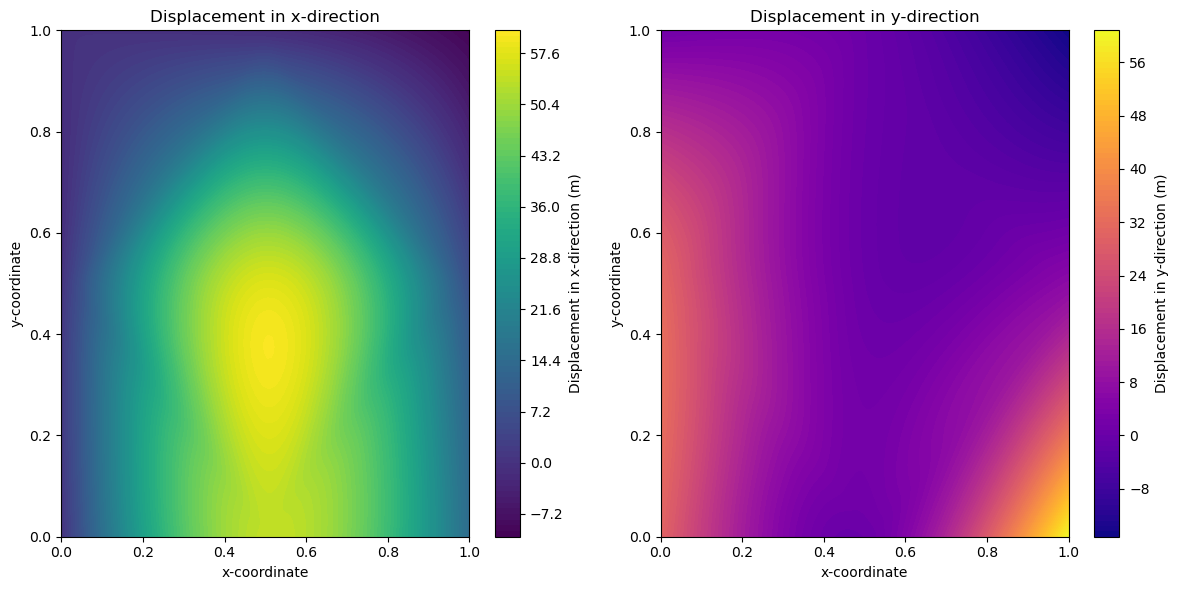

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Node coordinates for the plate (9 nodes in total)
nodes = np.array([(0, 0), (0.5, 0), (1, 0), 
                  (0, 0.5), (0.5, 0.5), (1, 0.5), 
                  (0, 1), (0.5, 1), (1, 1)])

# Displacement vector (replace with your calculated displacements)
displacement_vector = solve_displacement()

# Extract displacements in x and y directions
displacement_x = displacement_vector[::2]  # u_x for each node (even indices)
displacement_y = displacement_vector[1::2]  # u_y for each node (odd indices)

# Create a grid for interpolation (100x100 grid for smoothness)
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]

# Interpolate displacements in x and y directions on the grid
displacement_x_grid = griddata(nodes, displacement_x, (grid_x, grid_y), method='cubic')
displacement_y_grid = griddata(nodes, displacement_y, (grid_x, grid_y), method='cubic')

# Plotting the displacement in the x-direction (u_x)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(grid_x, grid_y, displacement_x_grid, 100, cmap='viridis')
plt.colorbar(label='Displacement in x-direction (m)')
plt.title('Displacement in x-direction')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

# Plotting the displacement in the y-direction (u_y)
plt.subplot(1, 2, 2)
plt.contourf(grid_x, grid_y, displacement_y_grid, 100, cmap='plasma')
plt.colorbar(label='Displacement in y-direction (m)')
plt.title('Displacement in y-direction')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

# Show both plots
plt.tight_layout()
plt.show()


# Second Approach: Kronecker Product for Assemblying the 2D Stiffness Matrix while having the 1D Stiffness Matrix

After calculating the basis functions $N_i(u)$ in the $u-$ direction and $M_j(v)$ in the $v-$ direction, the next step in assembling the stiffness matrix in Isogeometric Analysis (IGA) is to compute the element stiffness matrices and then assemble them into the global stiffness matrix. The key point here is that since the problem is 2D with two parametric directions $u$ and $v$, the stiffness matrix for each element can be computed by taking the Kronecker product of the 1D stiffness matrices in the u- and v-directions.

We will now go through the full procedure step-by-step.

Let's recap the final expression for the Stiffness Matrix of the 1D case after utilizing the Gaussian Quadrature for 2 integration points:

$$
K_{ij} = 0.125\sum_{K = 1}^{2}(\frac{dN_i}{dξ}|_{ξ_{Κ}}\frac{dN_j}{dξ}|_{ξ_{Κ}})
$$
where $K$ is the transformed Gauss Point into our domain of interest $[0, 1]$. We will use the same integration points as in the 1D Bar case with unit length, both for the $u-$ and for the $v-$ direction.

For two linear elements in the $u-$ direction (3 control points in total), the stiffness matrix $K_u$ is a $3 {X} 3$ matrix.

### 1st Element
For $ξ_{1} = 0.106$ and $ξ_{2} = 0.394$:
$$
\frac{dN_{0,1}}{dξ}|_{ξ1} = -2
$$
$$
\frac{dN_{1,1}}{dξ}|_{ξ1} = 2
$$

$$
\frac{dN_{0,1}}{dξ}|_{ξ2} = -2
$$
$$
\frac{dN_{1,1}}{dξ}|_{ξ2} = 2
$$


Calculate for each pair of basis functions $i, j$:
1. For $K_{00}$:
$$
K_{00} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,1}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{00} = 0.125((-2)^2 + (-2)^2) = 0.125(8) = 1  
$$

2. For $K_{01}$:
$$
K_{01} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{0,1}}{dξ}|_{ξ_{Κ}})(\frac{dN_{1,1}}{dξ}|_{ξ_{Κ}})
$$
$$
K_{01} = 0.125((−2 \times 2) + (-2 \times 2)) = 0.125(-4 -4) = 0.125(-8) = -1
$$

1. For $K_{11}$:
$$
K_{11} = 0.5\sum_{K = 1}^{2}w_{K}(\frac{dN_{1,1}}{dξ}|_{ξ_{Κ}})^2
$$
$$
K_{11} = 0.125 \times ((2)^2 + (2)^2) = 0.125 (8) = 1
$$

So finally we end up with the stiffness matrix for the 1st element as:

$$
K_{e1} = 
\begin{bmatrix}
 1       & -1 \\
-1       &  1 \\
\end{bmatrix}
$$


For the 2nd element the stiffness matrix is the same:

$$
K_{e2} = 
\begin{bmatrix}
 1       & -1 \\
-1       &  1 \\
\end{bmatrix}
$$

Assemblying of those matrices for the $u-$ direction:

$$
K_{u} = 
\begin{bmatrix}
 1      &  -1      &  0 \\
-1      &   2      & -1 \\
 0      &  -1      & 1 \\
\end{bmatrix}
$$

Since the problem is symmetric (same basis functions and elements in both directions), the stiffness matrix in the $v-$ direction is identical to that in the $u-$ direction.

$$
K_{v} = 
\begin{bmatrix}
 1      &  -1      &  0 \\
-1      &   2      & -1 \\
 0      &  -1      & 1 \\
\end{bmatrix}
$$

## Kronecker product

The Kronecker product is commonly used in Isogeometric Analysis (IGA) to construct the 2D Basis Functions from 1D Basis Functions, especially when dealing with tensor-product grids. Let's break down how this works in the context of assembling the stiffness matrix for a 2D plate.

The Kronecker product is a mathematical operation that takes two matrices and produces a block matrix. In the context of IGA, when constructing the basis functions for a 2D domain using 1D basis functions, the Kronecker product is used to combine the 1D basis functions in the $ 𝑢- $ and $ v- $ directions to form the 2D basis functions.

Given:
- 1D basis functions in the $ u $ direction: $ N_i(ξ)$
- 1D basis functions in the $ v $ direction: $ M_j(η)$

The 2D basis functions $ Φ_{ij}(ξ, η) $ are formed by taking the Kronecker product of $ N_i(ξ) $ and $ M_j(η)$:
$$
Φ_{ij}(ξ, η) = Ν_i(ξ) \times M_j(η)
$$

For a 2D plate, the stiffness matrix is assembled by considering the contributions form both the $ u $ and $ v $ directions. The Kronecker product allows us to systematically construct the global stiffness matrix from the 1D stiffness matrices.

Let's recap:
- $ K_u$: The stiffness matrix corresponding to the $ u- $ direction.
- $ K_v$: The stiffness matrix corresponding to the $ v- $ direction.

The global stiffness matrix $ K $ for the 2D plate can be constructed using the Kronecker product as:

$$
K_{2D} = K_u \otimes K_v
$$

Where:
-  $ \otimes  $ denotes the Kronecker product.
- $ K_u $ and $ K_v $ are matrices that represent the stiffness contributios in the $ u $ and $ v $ directions, respectively.
- Since both $ K_{u} $ and $ K_{v} $ are $ 3{X}3 $ matrices, their Kronecker product will result in a $ 9{X}9 $ matrix.

So the basic methodology is:
- Compute the stiffness matrices $ K_u $ and $ K_v $ in the $ u- $ and $ v- $ directions, respectively. These are caclulated similarly to the 1D bar problem.
- Kronecker Product: Use the Kronecker product to combine these 1D stiffness matrices to form the 2D stiffness matrix. The Kronecker product of two matrices $ A $ (of size $ m \times n$) and $ B$ (of size $ p \times q$) is a block matrix of size $ mp \times nq $ where each element $ a_{ij} $ of matrix $ A $ is multiplied by the entire matrix $ B$ .

We now calculate the Kronecker product of the two $ 3×3 $ matrices $ K_{u} $ and $ 𝐾_{v}$.

$$
K_{2D} = 
\begin{bmatrix}
 1      &  -1      &  0 \\
-1      &   2      & -1 \\
 0      &  -1      & 1 \\
\end{bmatrix}

\otimes

\begin{bmatrix}
 1      &  -1      &  0 \\
-1      &   2      & -1 \\
 0      &  -1      & 1 \\
\end{bmatrix}
$$

This results in a block matrix where each entry of $ K_{u} $ is multiplied by the entire matrix $ K_{v}$. 

Let's go step by step:

### First Row
- $1 \times K_{v}$: $$ 1 \times K_{v} = \begin{bmatrix}  
1      &  -1      &  0 \\
-1      &   2      & -1 \\
 0      &  -1      & 1 \\
\end{bmatrix} $$

- $-1 \times K_{v}$: $$ -1 \times K_{v} = \begin{bmatrix}  
-1      &  1      &  0 \\
 1      & -2      &  1 \\
 0      &  1      & -1 \\
\end{bmatrix} $$

- $0 \times K_{v}$: $$ 0 \times K_{v} = \begin{bmatrix}  
0      &  0      &  0 \\
0      &  0      &  0 \\
0      &  0      &  0 \\
\end{bmatrix} $$

### Second Row
- $-1 \times K_{v}$: $$ -1 \times K_{v} = \begin{bmatrix}  
-1      &  1      &  0 \\
 1      & -2      &  1 \\
 0      &  1      & -1 \\
\end{bmatrix} $$

- $2 \times K_{v}$: $$ 2 \times K_{v} = \begin{bmatrix}  
2      &  -2      &   0 \\
-2     &  4       &  -2 \\
0      &  -2      &   2 \\
\end{bmatrix} $$

- $ -1 \times K_{v}$: $$ -1 \times K_{v} = \begin{bmatrix}  
-1      &  1      &  0 \\
 1      & -2      &  1 \\
 0      &  1      & -1 \\
\end{bmatrix} $$

### Third Row
- $ 0 \times K_{v}$: $$ 0 \times K_{v} = \begin{bmatrix}  
0      &  0      &  0 \\
0      &  0      &  0 \\
0      &  0      &  0 \\
\end{bmatrix} $$

- $ -1 \times K_{v}$: $$ -1 \times K_{v} = \begin{bmatrix}  
-1      &  1      &  0 \\
 1      & -2      &  1 \\
 0      &  1      & -1 \\
\end{bmatrix} $$

- $ 1 \times K_{v}$: $$ 1 \times K_{v} = \begin{bmatrix}  
1      &  -1      &  0 \\
-1      &   2      & -1 \\
 0      &  -1      & 1 \\
\end{bmatrix} $$

### Final Global Stiffness Matrix for 2D Plate

By combining all the blocks from the Kronecker product, we get the final global stiffness matrix for the 2D plate, which is a $9{X}9$ matrix:


$$ 
K_{v} = 
\begin{bmatrix}
 1 & -1 &  0 & -1 &  1 &  0 &  0 &  0 &  0 \\
-1 &  2 & -1 &  1 & -2 &  1 &  0 &  0 &  0 \\
 0 & -1 &  1 &  0 &  1 & -1 &  0 &  0 &  0 \\
-1 &  1 &  0 &  2 & -2 &  0 & -1 &  1 &  0 \\
 1 & -2 &  1 & -2 &  4 & -2 &  1 & -2 &  1 \\
 0 &  1 & -1 &  0 & -2 &  2 &  0 &  1 & -1 \\
 0 &  0 &  0 & -1 &  1 &  0 &  1 & -1 &  0 \\
 0 &  0 &  0 &  1 & -2 &  1 & -1 &  2 & -1 \\
 0 &  0 &  0 &  0 &  1 & -1 &  0 & -1 &  1 \\
\end{bmatrix} 
$$

# DUMMY

For More Complex Elements: If you were dealing with higher-dimensional problems, nonlinear materials, or nonlinear shape functions, then expressing and utilizing the strain-displacement matrix would be more relevant and necessary.

Thus, you can proceed with assembling the global stiffness matrix using the stiffness matrices you computed for each element without needing to separately express the strain-displacement matrix.

As the order of basis functions increases in Finite Element Analysis (FEM) or Isogeometric Analysis (IGA), the complexity of the stiffness matrix computation increases. Here are some strategies and considerations for assembling the stiffness matrix efficiently, especially when dealing with higher-order basis functions:

Matrix Sparsity:
Exploiting Sparsity: The stiffness matrix is often sparse, meaning many of its entries are zero. This sparsity can be exploited to save memory and computational time. Utilize sparse matrix data structures and operations to handle large matrices efficiently.

Band Structure: 
For 1D problems, matrices typically have a banded structure, which can be leveraged to reduce computational complexity.

Assembly Process Optimization:

Local Assembly: Compute the element stiffness matrices locally and then assemble them into the global matrix. This localized approach helps manage memory and computational resources more effectively.

Efficient Indexing: Use efficient indexing schemes to assemble the global matrix from local element matrices, minimizing the overhead involved in matrix operations.

Parallel Processing:

Element-wise Parallelism: Since the computation for each element is independent of others, the assembly process can be parallelized. Assign different elements to different processors or threads.

Integration Parallelism: Numerical integration over each element can also be parallelized, where different integration points or elements are processed simultaneously.

Matrix Compression and Storage:

Sparse Matrix Formats: 
Use compressed sparse row (CSR) or compressed sparse column (CSC) formats to store and manipulate sparse matrices efficiently.

Efficient Memory Usage: 
Employ techniques such as block storage or hierarchical data structures to manage large matrices and reduce memory overhead.

Algorithmic Improvements:

Fast Matrix Operations: Use optimized libraries for matrix operations, such as BLAS or LAPACK, which are implemented with high efficiency and can handle large-scale problems effectively.

Preconditioning: 
For iterative solvers, use preconditioners to improve convergence rates and reduce computational time.

Parallel Approaches
Domain Decomposition:

Spatial Decomposition: Divide the domain into smaller subdomains that can be processed independently. Each subdomain can be handled by a separate processor, with communication between processors to handle boundary conditions and data exchange.
Task Parallelism:

Separate Tasks: Break down the assembly process into separate tasks (e.g., integration, matrix assembly) that can be executed concurrently. Distribute these tasks across multiple processors or cores.
Data Parallelism:

Matrix Operations: For matrix operations that are inherently parallel, such as matrix multiplication or factorization, use parallel algorithms to speed up computations.
GPU Acceleration:

Leverage GPUs: Use Graphics Processing Units (GPUs) for highly parallelizable operations, such as matrix assembly and integration. GPUs can handle large-scale computations more efficiently than CPUs in many cases.
Summary
In summary, when dealing with higher-order basis functions and the corresponding stiffness matrices, the following approaches can enhance efficiency:

Use adaptive or higher-order quadrature for accurate integration.
Exploit matrix sparsity and banded structures.
Optimize the assembly process with local computations and efficient indexing.
Utilize parallel processing for both element computations and integration.
Apply matrix compression techniques and optimized libraries.
Consider domain decomposition and task parallelism for large-scale problems.
By incorporating these strategies, you can handle the increased complexity of higher-order basis functions more efficiently and effectively.

 OPTIONAL:
- Python script to create the B-Splines and control them.
- Python script to visualize each step of the procedure and how the control points will be moved after the solution and how the new geometry will be described.
- Write the domains which should run in parallel. There is no interdependency so it is feasible to parallelize.

### Vector $R$

#### Definition:
The vector $R$ generally contains the partial derivatives of the shape functions with respect to spatial coordinates. It helps in evaluating the contributions to the $B$ matrix but is not directly used in the stiffness matrix formulation.

#### Form:
The form of $R$ varies depending on the element type and dimensionality. For example:

#### 1D Bar Element:
$$
R = \begin{bmatrix} \frac{dN_1}{dx} & \frac{dN_2}{dx} \end{bmatrix}
$$

#### 2D Quadrilateral Element:
$$
R = \begin{bmatrix} \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial x} & \frac{\partial N_1}{\partial y} & \frac{\partial N_2}{\partial y} \end{bmatrix}
$$

#### 3D Hexahedral Element:
$$
R = \begin{bmatrix} \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial x} & \frac{\partial N_1}{\partial y} & \frac{\partial N_2}{\partial y} & \frac{\partial N_1}{\partial z} & \frac{\partial N_2}{\partial z} \end{bmatrix}
$$

### Incorporation of $R$ into $B$:


The matrix $B$ can be constructed using the derivatives contained in the vector $R$. Specifically, $B$ incorporates these derivatives in a structured way that translates nodal displacements into strains.

#### For example:

- **In 1D:** $B$ is directly derived from $R$, i.e., $B = R$.
- **In 2D:** $B$ is constructed from the partial derivatives of the shape functions in both $x$ and $y$, which are included in $R$.
- **In 3D:** $B$ involves the partial derivatives in $x$, $y$, and $z$, structured from $R$.

#### Summary:

- $R$ is a vector of partial derivatives of shape functions and helps in forming the strain-displacement matrix $B$.
- $B$ is the matrix that relates nodal displacements to strains. It is constructed using the derivatives provided in $R$ in a structured format suitable for the dimensionality of the problem.

In essence, $R$ provides the raw data of shape function derivatives, while $B$ organizes this data into a matrix that facilitates the calculation of strains from nodal displacements in finite element analysis.


So in our 2D case we end-up with:

#### Step 1: General Form of Strain-Displacement Matrix $B$ in 2D

For a 2D quadrilateral element, the strain-displacement matrix $B$ is typically structured to relate the nodal displacements $u$ and $v$ in the $x-$ and $y-$ directions to the strain components $\varepsilon_x$, $\varepsilon_y$, and $\gamma_{xy}$ (shear strain). This general form of $B$ in 2D is:

$$
B =
\begin{bmatrix}
\frac{\partial N_1}{\partial x} & 0 & \frac{\partial N_2}{\partial x} & 0 & \cdots & \frac{\partial N_n}{\partial x} & 0 \\
0 & \frac{\partial N_1}{\partial y} & 0 & \frac{\partial N_2}{\partial y} & \cdots & 0 & \frac{\partial N_n}{\partial y} \\
\frac{\partial N_1}{\partial y} & \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial y} & \frac{\partial N_2}{\partial x} & \cdots & \frac{\partial N_n}{\partial y} & \frac{\partial N_n}{\partial x}
\end{bmatrix}
$$

This matrix translates the nodal displacements into the strain field components.

- The first row corresponds to the normal strain $\varepsilon_x = \frac{\partial u}{\partial x}$.
- The second row corresponds to the normal strain $\varepsilon_y = \frac{\partial v}{\partial y}$.
- The third row corresponds to the shear strain $\gamma_{xy} = \frac{\partial u}{\partial y} + \frac{\partial v}{\partial x}$.

#### Step 2: Introducing the Derivative Vector $R$

In isogeometric analysis or finite element analysis, the derivatives of the shape functions can be represented as components of a vector $R$, such that:

$$
R_x = \frac{\partial N}{\partial x}, \quad R_y = \frac{\partial N}{\partial y}
$$

These are the partial derivatives of the shape functions with respect to the spatial coordinates $x$ and $y$.

#### Step 3: Simplifying the Strain-Displacement Matrix $B$

Given that the vector $R$ contains these partial derivatives, we can organize the components of the matrix $B$ as follows:

- The first row, representing the strain $\varepsilon_x$, contains the derivative with respect to $x$, so it is $R_x$.
- The second row, representing the strain $\varepsilon_y$, contains the derivative with respect to $y$, so it is $R_y$.
- The third row, representing the shear strain $\gamma_{xy}$, involves both $\frac{\partial u}{\partial y}$ and $\frac{\partial v}{\partial x}$, so this row contains $R_y$ and $R_x$.

Thus, the strain-displacement matrix $B$ can be written in terms of $R_x$ and $R_y$:

$$
B =
\begin{bmatrix}
R_x & 0 \\
0 & R_y \\
R_y & R_x
\end{bmatrix}
$$

#### Conclusion:

- $R_x$ and $R_y$ represent the partial derivatives of the shape functions with respect to $x$ and $y$, respectively.
- The simplified matrix $B$ in 2D relates the displacement components $u$ and $v$ to the strain components by organizing these derivatives into the appropriate rows for normal and shear strains. 

This form of $B$ is particularly useful for compactly expressing the strain-displacement relationship in finite element and isogeometric analysis for 2D problems.

## Comparison between full and condensed form of $B$

Consider a 2D quadrilateral element with 2 nodes. Each node has two degrees of freedom (DOF): 
- $u_i$: displacement in the $x$-direction at node $i$,
- $v_i$: displacement in the $y$-direction at node $i$.

The shape functions $N_1(x,y)$ and $N_2(x,y)$ are used to interpolate the displacement field within the element. 

Now, we are interested in the relationship between the strains and the nodal displacements via the strain-displacement matrix $B$.

Step 1: The Full Strain-Displacement Matrix $B$

For a 2D element with nodes having $u$- and $v$-displacements, the strain-displacement matrix $B$ typically looks like this:

$$
B =
\begin{bmatrix}
\frac{\partial N_1}{\partial x} & 0 & \frac{\partial N_2}{\partial x} & 0 \\
0 & \frac{\partial N_1}{\partial y} & 0 & \frac{\partial N_2}{\partial y} \\
\frac{\partial N_1}{\partial y} & \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial y} & \frac{\partial N_2}{\partial x}
\end{bmatrix}
$$

- First row: Links the displacement $u_1, u_2$ in the $x$-direction with the derivatives of the shape functions $\frac{\partial N_1}{\partial x}, \frac{\partial N_2}{\partial x}$.
- Second row: Links the displacement $v_1, v_2$ in the $y$-direction with the derivatives of the shape functions $\frac{\partial N_1}{\partial y}, \frac{\partial N_2}{\partial y}$.
- Third row: Captures the shear strain contributions, combining both $u$- and $v$-displacements with cross-derivatives $\frac{\partial N_1}{\partial y}, \frac{\partial N_1}{\partial x}, \frac{\partial N_2}{\partial y}, \frac{\partial N_2}{\partial x}$.

This form of the matrix keeps the displacements in the $x$ and $y$-directions clearly separated, with zeros ensuring that each DOF is only contributing to the appropriate part of the strain.

Step 2: Simplified Strain-Displacement Matrix $B$

The simplified form of the strain-displacement matrix for a 2D problem looks like this:

$$
B =
\begin{bmatrix}
R_x & 0 \\
0 & R_y \\
R_y & R_x
\end{bmatrix}
$$

Where:
- $R_x = \frac{\partial N_1}{\partial x}, \frac{\partial N_2}{\partial x}, \dots$ are the derivatives of the shape functions with respect to $x$,
- $R_y = \frac{\partial N_1}{\partial y}, \frac{\partial N_2}{\partial y}, \dots$ are the derivatives of the shape functions with respect to $y$.

Step 3: Comparing the Two Forms

Full Form for 2 Nodes:

Let’s substitute values for a simple case with 2 nodes.

For node 1 and 2:
- $R_x = \begin{bmatrix} \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial x} \end{bmatrix}$
- $R_y = \begin{bmatrix} \frac{\partial N_1}{\partial y} & \frac{\partial N_2}{\partial y} \end{bmatrix}$

Now the full matrix would be:

$$
B =
\begin{bmatrix}
\frac{\partial N_1}{\partial x} & 0 & \frac{\partial N_2}{\partial x} & 0 \\
0 & \frac{\partial N_1}{\partial y} & 0 & \frac{\partial N_2}{\partial y} \\
\frac{\partial N_1}{\partial y} & \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial y} & \frac{\partial N_2}{\partial x}
\end{bmatrix}
$$

Simplified Form:

In the simplified version, for the same 2 nodes:

$$
B =
\begin{bmatrix}
R_x & 0 \\
0 & R_y \\
R_y & R_x
\end{bmatrix}
$$
$$
B = 
\begin{bmatrix}
\frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial x} & 0 & 0 \\
0 & 0 & \frac{\partial N_1}{\partial y} & \frac{\partial N_2}{\partial y} \\
\frac{\partial N_1}{\partial y} & \frac{\partial N_2}{\partial y} & \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial x}
\end{bmatrix}
$$

Why Are These Equivalent?

1. Zeros in the Matrix:
   The zeros in the full matrix serve to separate the $u$- and $v$-components of the displacement for each node. In the simplified matrix, these zeros are still implied by the structure of the matrix. Since we have grouped the partial derivatives, we no longer need the explicit zeros to separate the terms.

2. Organized Derivatives:
   In the full form, the matrix entries are arranged in such a way to keep the displacement in the $x$-direction (related to $u$) and in the $y$-direction (related to $v$) distinct. The simplified form does this as well by grouping the derivatives of the shape functions, but it doesn't explicitly separate them with zeros because it's focused on the individual degrees of freedom in a more compact form.

Summary

- In the full matrix, the zeros help ensure the displacement components $u$ (in the $x$-direction) and $v$ (in the $y$-direction) are contributing to the appropriate strain components.
  
- In the simplified matrix, the zeros are not explicitly shown because the derivatives are grouped together (i.e., $R_x$ and $R_y$) to represent how the shape functions contribute to strain. The absence of zeros doesn’t change the functionality because the partial derivatives still link the displacements to the strain, but in a more compact form.

Both matrices serve the same purpose: to compute strains from nodal displacements. The simplified form is just a more condensed way to represent the same information, omitting unnecessary zero entries for clarity in local evaluations.